# AI Algorithms-11689, 1002-02
## Final Project -Analysis of classification algorithms and building best solution
## Solution for remote education

## Purnima Yadav
## 100800499

In [327]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import pandas.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt

# data analysis
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [328]:
pd.options.display.max_columns = None

## Importing World Dataset
### This dataset contains the countries where schools have been closed and the date they were closed. It contains columns like CountryCode, CountryName,  IfClosedWhen, IncomeLevel, Enrolment of senior secondary, primary children.

In [337]:
world_data = pd.read_csv('World_data.csv')

In [338]:
world_data

Countryname  \
0                           Eritrea   
1                     Guinea-Bissau   
2                          Mongolia   
3                       Philippines   
4                          Bulgaria   
5                          Malaysia   
6                          Thailand   
7                       Timor-Leste   
8                         Indonesia   
9                West Bank and Gaza   
10                           Bhutan   
11                     Saudi Arabia   
12                           Panama   
13                         Paraguay   
14                       Costa Rica   
15                      El Salvador   
16                          Bolivia   
17                          Ecuador   
18                         Honduras   
19                            Gabon   
20                           Israel   
21                        Sri Lanka   
22                           Greece   
23                       Mauritania   
24                            Sudan   
25                          Senegal   
26                          Austria   
27                           Jordan   
28                           Rwanda   
29               Dominican Republic   
30                        Guatemala   
31                             Peru   
32                      Puerto Rico   
33                       Bangladesh   
34                         Maldives   
35                      Gambia, The   
36                 Congo, Dem. Rep.   
37                             Mali   
38                        Mauritius   
39                          Somalia   
40            Sao Tome and Principe   
41                           Mexico   
42                            Nepal   
43                       Seychelles   
44                      Congo, Rep.   
45                          Lesotho   
46                          Namibia   
47                         Eswatini   
48                       Madagascar   
49                           Malawi   
50                           Uganda   
51         Central African Republic   
52                            India   
53                         Zimbabwe   
54                            Palau   
55            Micronesia, Fed. Sts.   
56                          Myanmar   
57                         Cambodia   
58                         Colombia   
59                           Guyana   
60                          Morocco   
61                          Nigeria   
62               Russian Federation   
63                              NaN   
64                             Iraq   
65           Bosnia and Herzegovina   
66                          Belarus   
67                Brunei Darussalam   
68                            Japan   
69                          Liberia   
70                          Moldova   
71                           Sweden   
72                       San Marino   
73                            China   
74                          Vietnam   
75             Hong Kong SAR, China   
76                      Korea, Rep.   
77                          Georgia   
78                            Italy   
79                        Australia   
80                          Lao PDR   
81                      New Zealand   
82                 Papua New Guinea   
83                        Singapore   
84                         Portugal   
85                          Albania   
86                          Iceland   
87               Iran, Islamic Rep.   
88                           Kuwait   
89                      Yemen, Rep.   
90                          Hungary   
91                  North Macedonia   
92                       Azerbaijan   
93                           Cyprus   
94                   Czech Republic   
95                           Poland   
96                          Romania   
97                              NaN   
98                          Belgium   
99                          Denmark   
100                         Ireland   
101                       Lithuania   
102    

## Converting Date column to Datetime

In [339]:
world_data['IfclosedduetoCOVID19whend'] = pd.to_datetime(world_data['IfclosedduetoCOVID19whend'],errors = 'coerce')

In [340]:
world_data.dtypes

Countryname                                          object
IfclosedduetoCOVID19whend                    datetime64[ns]
Incomelevelname                                      object
Regionname                                           object
Statusof Schoolsaresomeall (copy) (group)            object
Countryname.1                                        object
Year Pre                                            float64
Year Prm                                            float64
Year Sec                                            float64
Year Ter                                            float64
Latitude (generated)                                float64
Longitude (generated)                               float64
Enrollment                                           object
Se Pre Enrl                                          object
Se Prm Enrl                                          object
Se Sec Enrl                                          object
Se Ter Enrl                             

In [341]:
world_data['IfclosedduetoCOVID19whend'] = world_data['IfclosedduetoCOVID19whend'].dt.strftime('%m/%d/%Y')

## Finding Missing Values

In [342]:
world_data.isna().sum()

Countryname                                   3
IfclosedduetoCOVID19whend                    26
Incomelevelname                               4
Regionname                                    4
Statusof Schoolsaresomeall (copy) (group)     0
Countryname.1                                 0
Year Pre                                      4
Year Prm                                      4
Year Sec                                      4
Year Ter                                      9
Latitude (generated)                          3
Longitude (generated)                         3
Enrollment                                    3
Se Pre Enrl                                   4
Se Prm Enrl                                   4
Se Sec Enrl                                   4
Se Ter Enrl                                   9
dtype: int64

In [343]:
world_data=world_data.rename({'IfclosedduetoCOVID19whend': 'Ifcloseddate', 'Statusof Schoolsaresomeall (copy) (group)': 'Schoolstatus'}, axis=1)

## Dropping irrelevant columns 

In [344]:
world_data=world_data.drop(['Countryname.1','Latitude (generated)','Longitude (generated)'],axis=1)

In [345]:
world_data['Incomelevelname'].value_counts()

High income            63
Upper middle income    57
Lower middle income    47
Low income             30
Name: Incomelevelname, dtype: int64

In [346]:
world_data['Schoolstatus'].value_counts()

Open with limitations                        101
Closed                                        57
Open                                          28
Closed (in select areas)                       7
Null, No information available, Not known      7
Seasonal school closures                       1
Name: Schoolstatus, dtype: int64

## Converting columns to numeric type 

In [347]:
world_data['Se Pre Enrl'] = world_data['Se Pre Enrl'].str.replace(',', '')
world_data['Se Pre Enrl'] = pd.to_numeric(world_data['Se Pre Enrl'], downcast='integer')
world_data['Se Pre Enrl'] = world_data['Se Pre Enrl'].fillna(-99)
world_data['Se Pre Enrl'] = world_data['Se Pre Enrl'].astype('int64')
world_data['Se Pre Enrl'] = world_data['Se Pre Enrl'].replace('-99', np.nan)

In [348]:
world_data['Se Prm Enrl'] = world_data['Se Prm Enrl'].str.replace(',', '')
world_data['Se Prm Enrl'] = pd.to_numeric(world_data['Se Prm Enrl'], downcast='integer')
world_data['Se Prm Enrl'] = world_data['Se Prm Enrl'].fillna(-99)
world_data['Se Prm Enrl'] = world_data['Se Prm Enrl'].astype('int64')
world_data['Se Prm Enrl'] = world_data['Se Prm Enrl'].replace('-99', np.nan)

In [349]:
world_data['Se Sec Enrl'] = world_data['Se Sec Enrl'].str.replace(',', '')
world_data['Se Sec Enrl'] = pd.to_numeric(world_data['Se Sec Enrl'], downcast='integer')
world_data['Se Sec Enrl'] = world_data['Se Sec Enrl'].fillna(-99)
world_data['Se Sec Enrl'] = world_data['Se Sec Enrl'].astype('int64')
world_data['Se Sec Enrl'] = world_data['Se Sec Enrl'].replace('-99', np.nan)

In [350]:
world_data['Se Ter Enrl'] = world_data['Se Ter Enrl'].str.replace(',', '')
world_data['Se Ter Enrl'] = pd.to_numeric(world_data['Se Ter Enrl'], downcast='integer')
world_data['Se Ter Enrl'] = world_data['Se Ter Enrl'].fillna(-99)
world_data['Se Ter Enrl'] = world_data['Se Ter Enrl'].astype('int64')
world_data['Se Ter Enrl'] = world_data['Se Ter Enrl'].replace('-99', np.nan)

In [351]:
world_data['Enrollment'] = world_data['Enrollment'].str.replace(',', '')
world_data['Enrollment'] = pd.to_numeric(world_data['Enrollment'], downcast='integer')
world_data['Enrollment'] = world_data['Enrollment'].fillna(-99)
world_data['Enrollment'] = world_data['Enrollment'].astype('int64')
world_data['Enrollment'] = world_data['Enrollment'].replace('-99', np.nan)

In [352]:
world_data

Countryname Ifcloseddate      Incomelevelname  \
0                           Eritrea          NaN           Low income   
1                     Guinea-Bissau          NaN           Low income   
2                          Mongolia   01/01/2020  Lower middle income   
3                       Philippines   03/10/2020  Lower middle income   
4                          Bulgaria          NaN  Upper middle income   
5                          Malaysia   03/16/2020  Upper middle income   
6                          Thailand   03/18/2020  Upper middle income   
7                       Timor-Leste   03/23/2020  Lower middle income   
8                         Indonesia   03/24/2020  Lower middle income   
9                West Bank and Gaza   05/03/2020  Lower middle income   
10                           Bhutan   09/03/2020  Lower middle income   
11                     Saudi Arabia   09/03/2020          High income   
12                           Panama   11/03/2020          High income   
13                         Paraguay   11/03/2020  Upper middle income   
14                       Costa Rica   12/03/2020  Upper middle income   
15                      El Salvador   12/03/2020  Lower middle income   
16                          Bolivia   03/13/2020  Lower middle income   
17                          Ecuador   03/13/2020  Upper middle income   
18                         Honduras   03/13/2020  Lower middle income   
19                            Gabon   03/13/2020  Upper middle income   
20                           Israel   03/13/2020          High income   
21                        Sri Lanka   03/13/2020  Upper middle income   
22                           Greece   11/14/2020          High income   
23                       Mauritania   03/14/2020  Lower middle income   
24                            Sudan   03/14/2020  Lower middle income   
25                          Senegal   03/14/2020  Lower middle income   
26                          Austria   11/15/2020          High income   
27                           Jordan   03/15/2020  Upper middle income   
28                           Rwanda   03/15/2020           Low income   
29               Dominican Republic   03/16/2020  Upper middle income   
30                        Guatemala   03/16/2020  Upper middle income   
31                             Peru   03/16/2020  Upper middle income   
32                      Puerto Rico   03/16/2020          High income   
33                       Bangladesh   03/16/2020  Lower middle income   
34                         Maldives   03/16/2020  Upper middle income   
35                      Gambia, The   03/18/2020           Low income   
36                 Congo, Dem. Rep.   03/19/2020           Low income   
37                             Mali   03/19/2020           Low income   
38                        Mauritius   03/19/2020  Upper middle income   
39                          Somalia   03/19/2020           Low income   
40            Sao Tome and Principe   03/19/2020  Lower middle income   
41                           Mexico   03/20/2020  Upper middle income   
42                            Nepal   03/20/2020           Low income   
43                       Seychelles   03/20/2020          High income   
44                      Congo, Rep.   03/21/2020  Lower middle income   
45                          Lesotho   03/22/2020  Lower middle income   
46                          Namibia   03/22/2020  Upper middle income   
47                         Eswatini   03/22/2020  Lower middle income   
48                       Madagascar   03/23/2020           Low income   
49                           Malawi   03/23/2020           Low income   
50                           Uganda   03/23/2020           Low income   
51         Central African Republic   03/24/2020           Low income   
52                            India   03/24/2020  Lower middle income   
53                         Zimbabwe   03/24/2020  Lower middle income   
54       

In [353]:
world_data.dtypes

Countryname         object
Ifcloseddate        object
Incomelevelname     object
Regionname          object
Schoolstatus        object
Year Pre           float64
Year Prm           float64
Year Sec           float64
Year Ter           float64
Enrollment           int64
Se Pre Enrl          int64
Se Prm Enrl          int64
Se Sec Enrl          int64
Se Ter Enrl          int64
dtype: object

## Finding duplicate rows

In [354]:
duplicate_rows = world_data[world_data.duplicated()]
#print("number of duplicated rows: ", duplicate_rows)
duplicate_rows

Empty DataFrame
Columns: [Countryname, Ifcloseddate, Incomelevelname, Regionname, Schoolstatus, Year Pre, Year Prm, Year Sec, Year Ter, Enrollment, Se Pre Enrl, Se Prm Enrl, Se Sec Enrl, Se Ter Enrl]
Index: []

## Building Histograms

array([[<AxesSubplot:title={'center':'Year Pre'}>,
        <AxesSubplot:title={'center':'Year Prm'}>,
        <AxesSubplot:title={'center':'Year Sec'}>],
       [<AxesSubplot:title={'center':'Year Ter'}>,
        <AxesSubplot:title={'center':'Enrollment'}>,
        <AxesSubplot:title={'center':'Se Pre Enrl'}>],
       [<AxesSubplot:title={'center':'Se Prm Enrl'}>,
        <AxesSubplot:title={'center':'Se Sec Enrl'}>,
        <AxesSubplot:title={'center':'Se Ter Enrl'}>]], dtype=object)

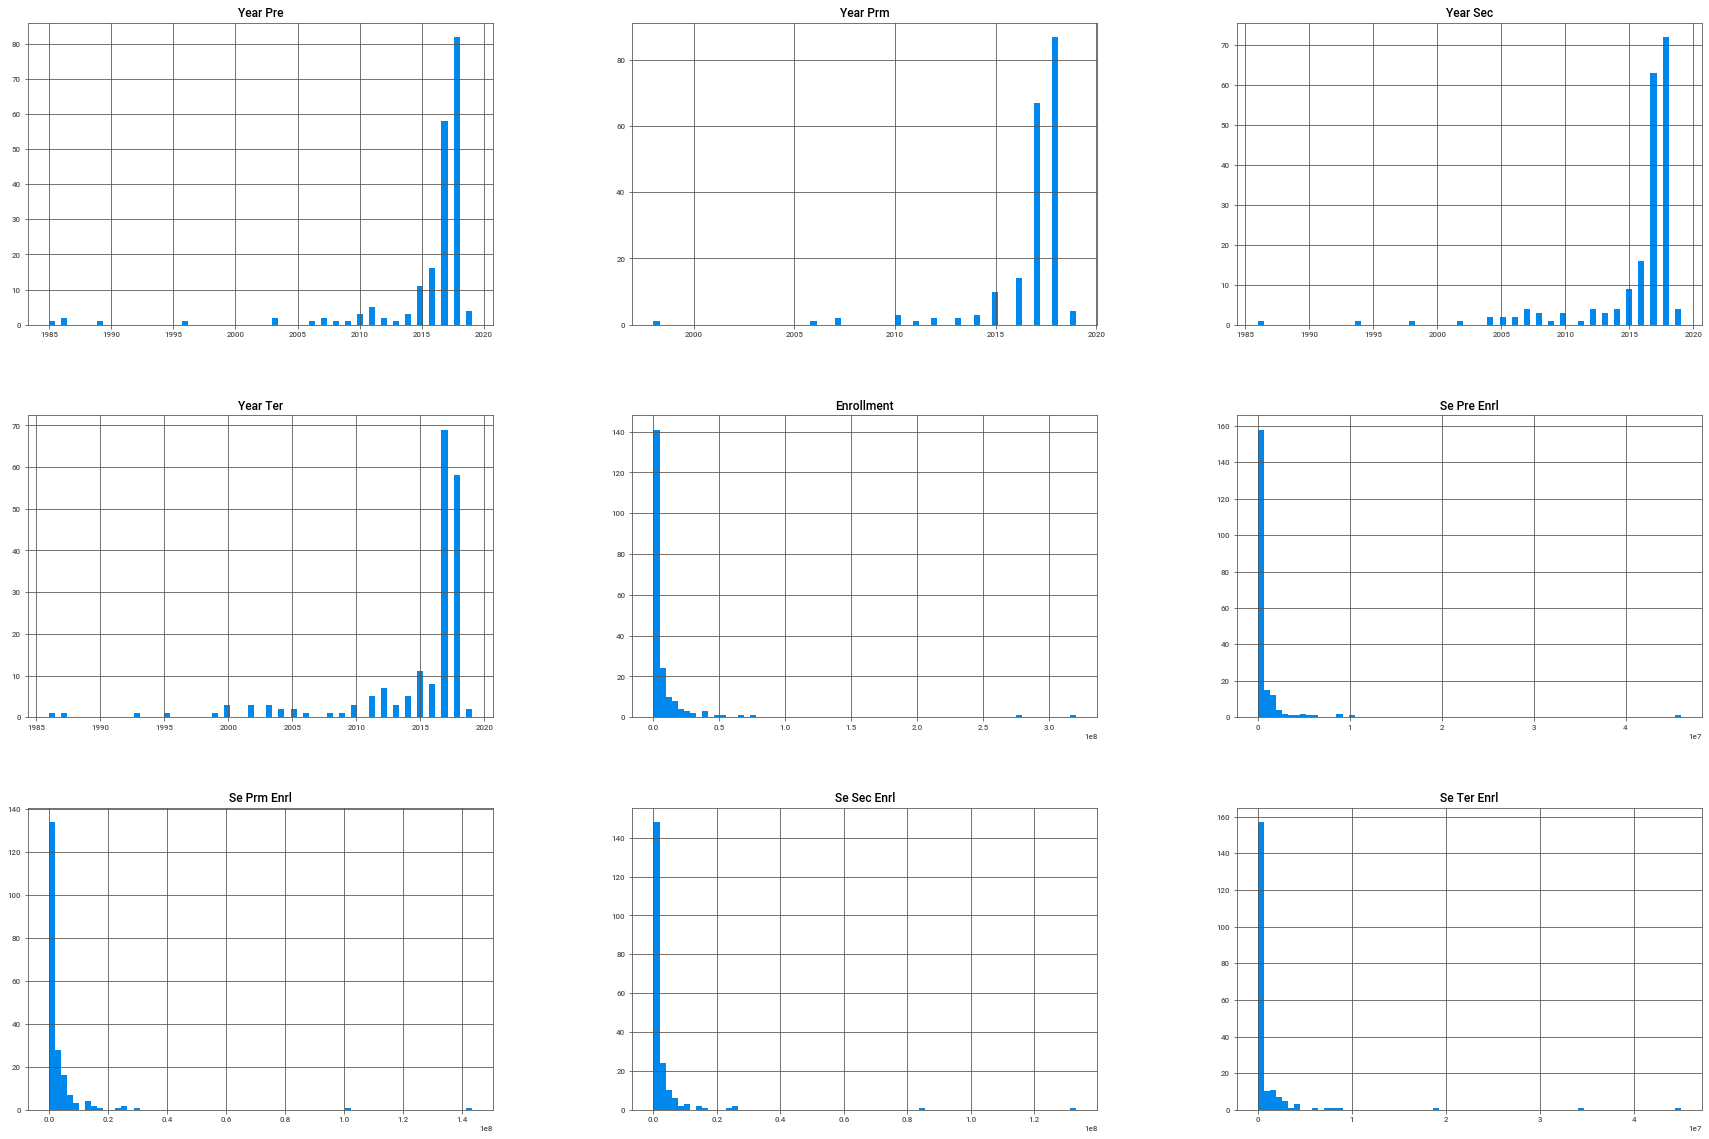

In [355]:
world_data.hist(bins=70, figsize=(30,20))

## Building Boxplots

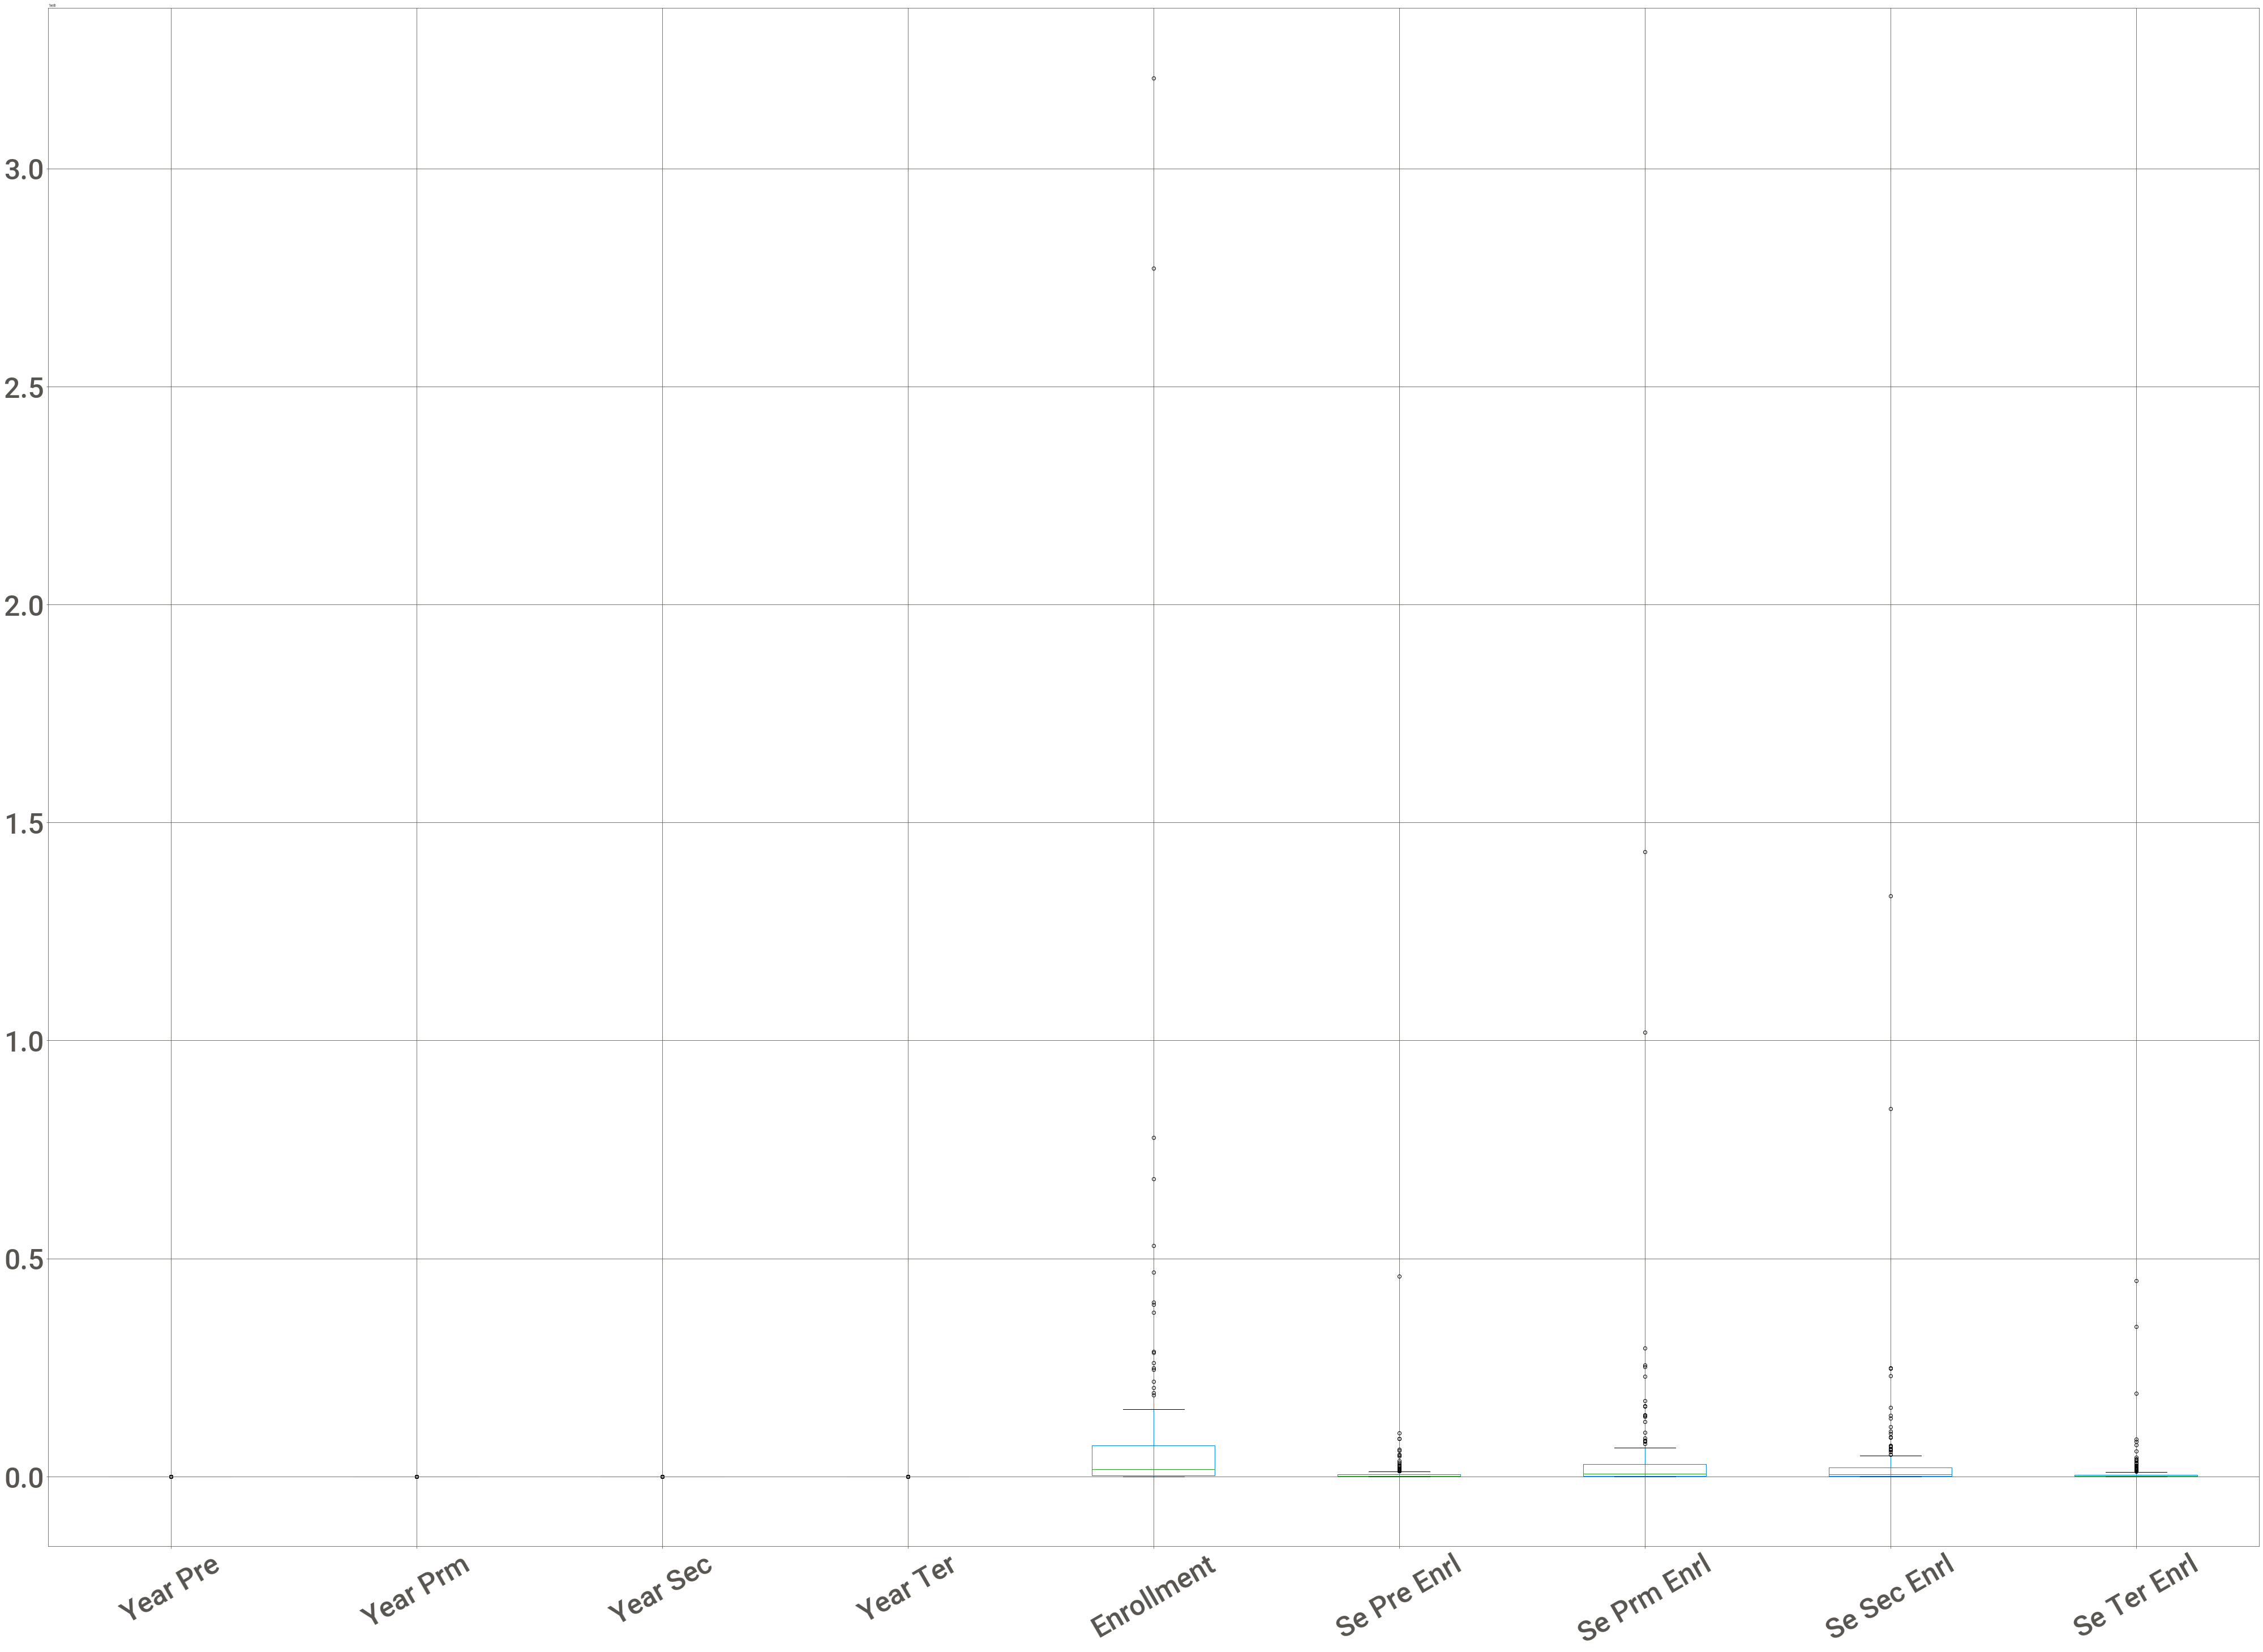

In [356]:
world_data.boxplot(figsize=(70,50), fontsize=50, rot=30)
plt.show()

## Outlier Analysis

In [357]:
#calculating quartiles
Q1 = world_data.quantile(0.25)
Q3 = world_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year Pre             2.0
Year Prm             1.0
Year Sec             2.0
Year Ter             3.0
Enrollment     6860373.0
Se Pre Enrl     493668.0
Se Prm Enrl    2788498.0
Se Sec Enrl    1935124.0
Se Ter Enrl     417949.0
dtype: float64


In [358]:
world_data.shape

(201, 14)

In [359]:
world_data = world_data[~((world_data < (Q1-1.5*IQR)) | (world_data > (Q3+1.5*IQR))).any(axis=1)]
world_data.shape

(110, 14)

### Removing outliers makes a significant difference in the data, therfore I decided to remove them. 

### Boxplot after removing outliers

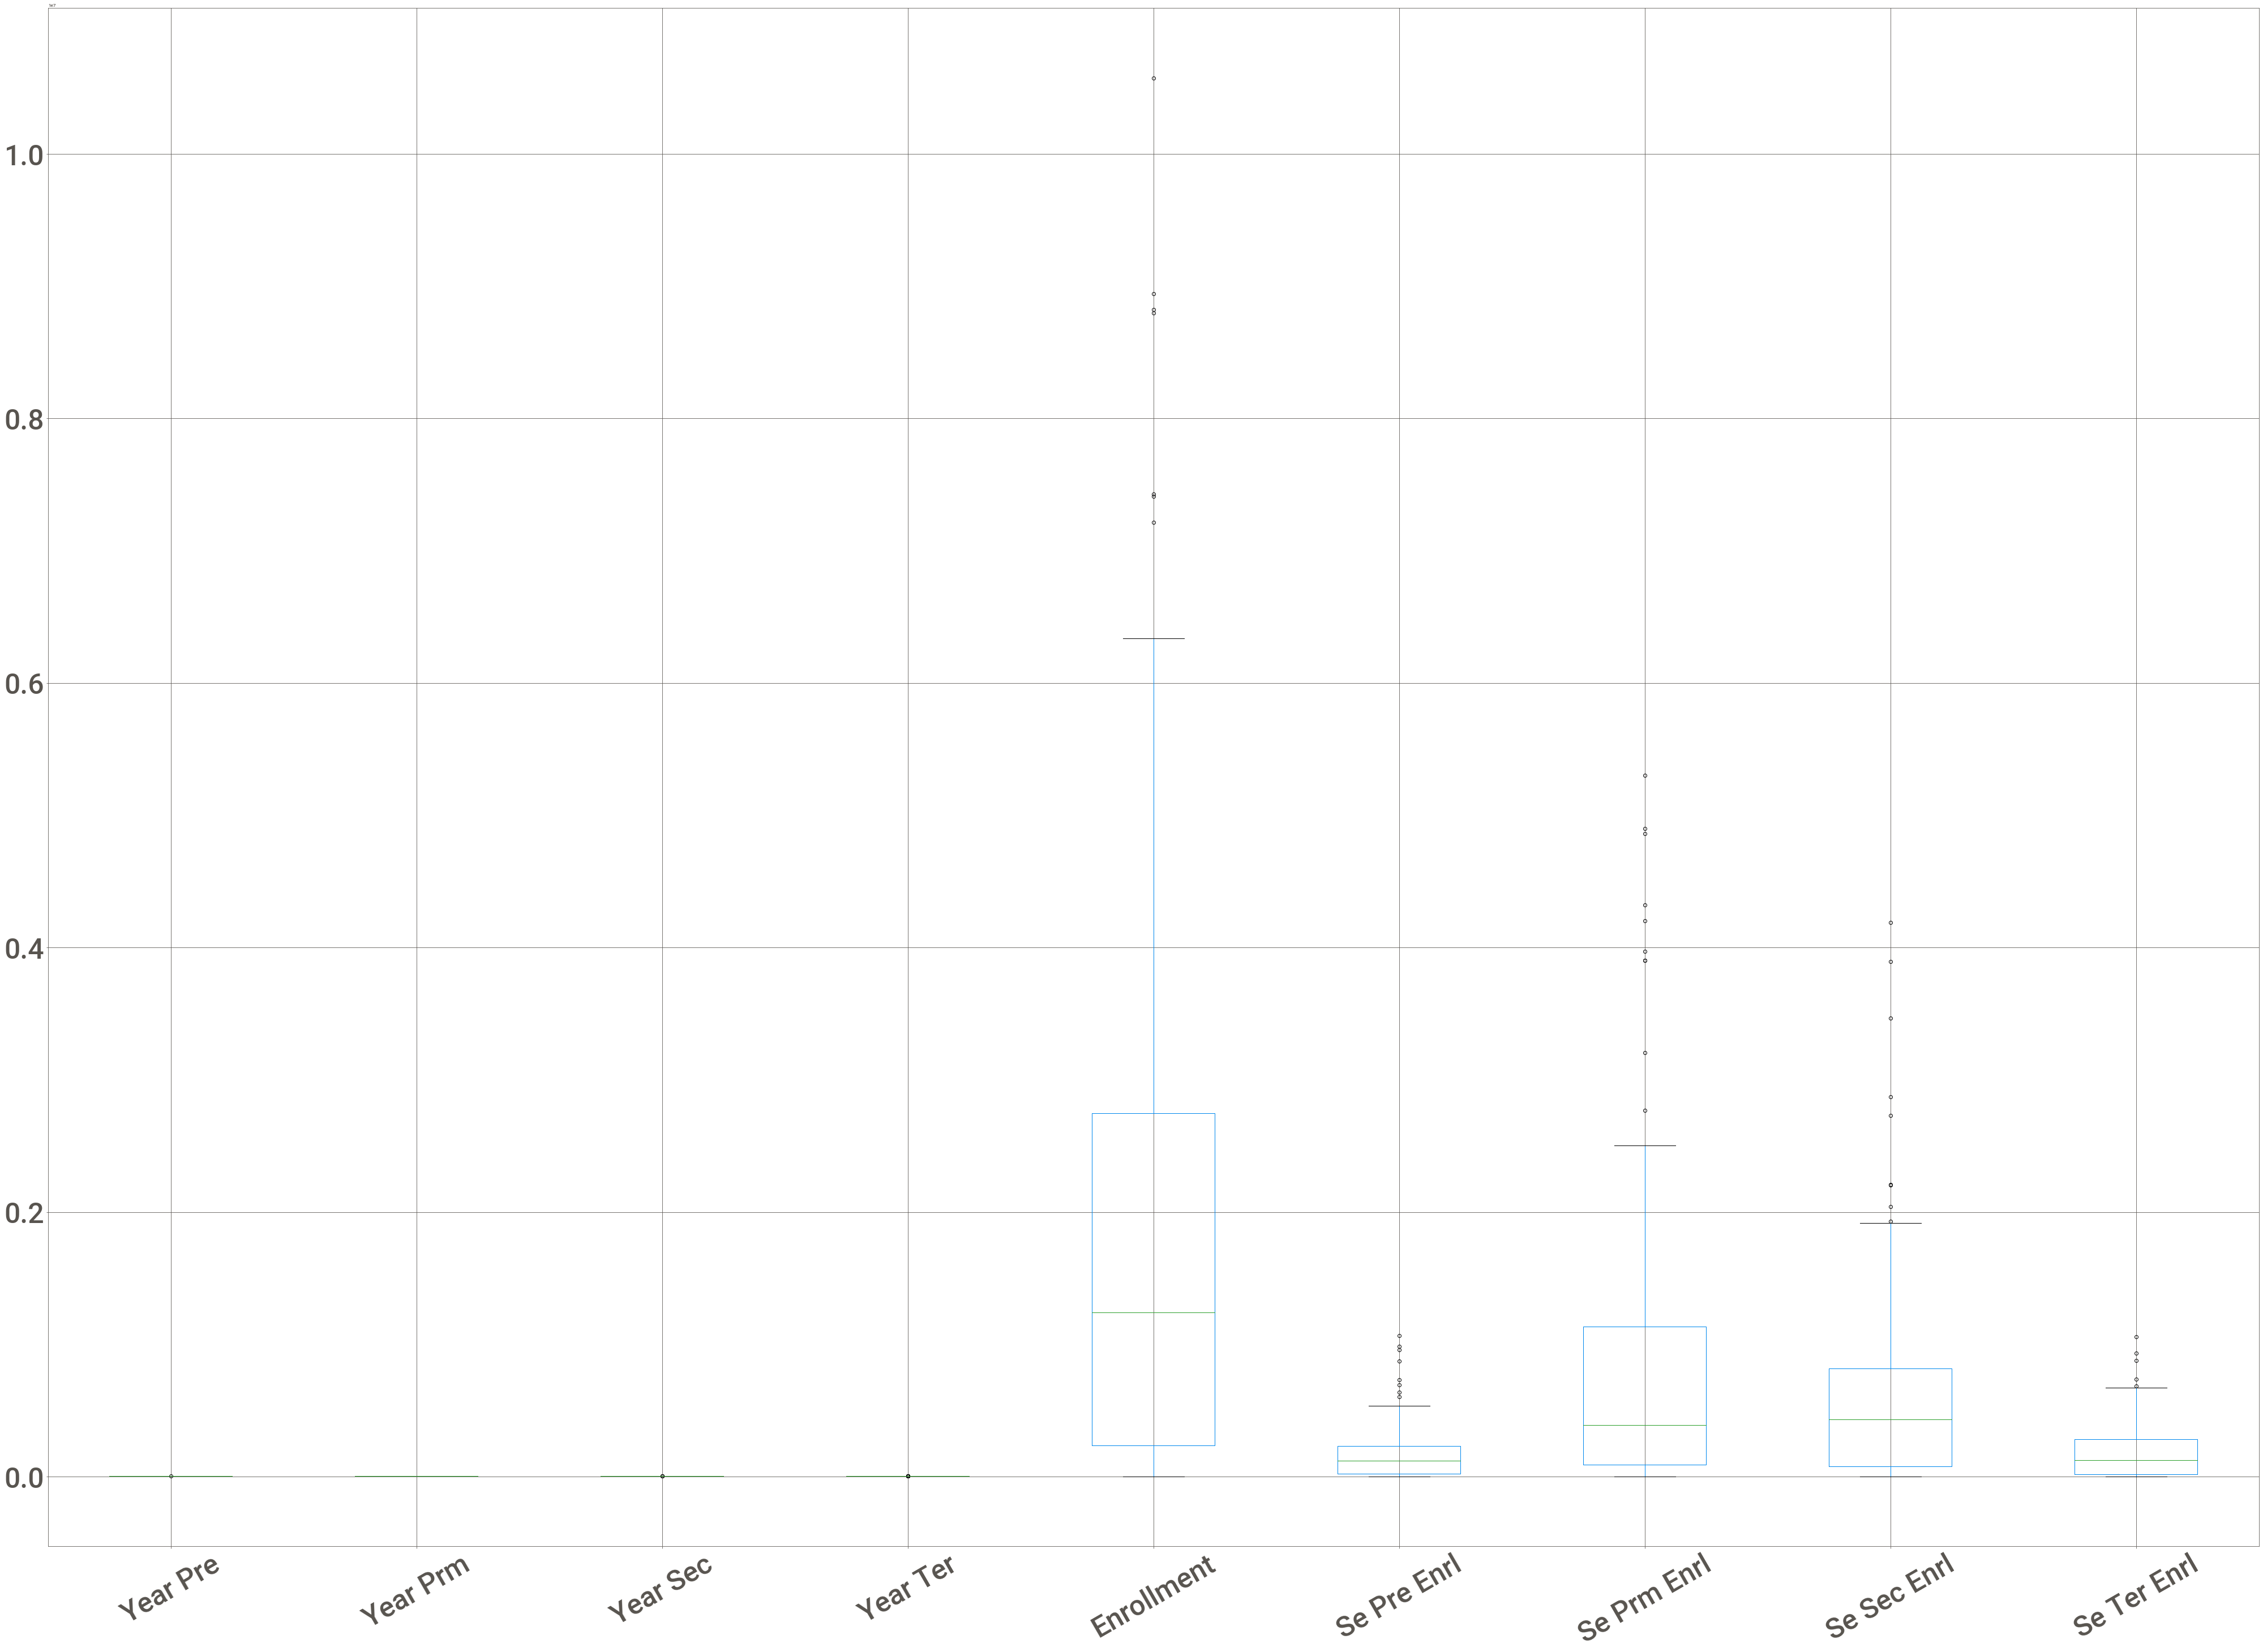

In [360]:
world_data.boxplot(figsize=(70,50), fontsize=50, rot=30)
plt.show()

## Building Correlation matrix

Year Pre  Year Prm  Year Sec  Year Ter  Enrollment  Se Pre Enrl  \
Year Pre     1.000000  0.841808  0.629096  0.251884    0.189853     0.188076   
Year Prm     0.841808  1.000000  0.680536  0.331096    0.174084     0.177882   
Year Sec     0.629096  0.680536  1.000000  0.211300    0.031871     0.073616   
Year Ter     0.251884  0.331096  0.211300  1.000000    0.110768     0.138416   
Enrollment   0.189853  0.174084  0.031871  0.110768    1.000000     0.760818   
Se Pre Enrl  0.188076  0.177882  0.073616  0.138416    0.760818     1.000000   
Se Prm Enrl  0.172148  0.150983  0.015011  0.042055    0.950544     0.613847   
Se Sec Enrl  0.206960  0.204941  0.045480  0.159631    0.949792     0.730949   
Se Ter Enrl  0.026580  0.000446 -0.000852  0.175920    0.687096     0.674492   

             Se Prm Enrl  Se Sec Enrl  Se Ter Enrl  
Year Pre        0.172148     0.206960     0.026580  
Year Prm        0.150983     0.204941     0.000446  
Year Sec        0.015011     0.045480    -0.000852  
Year Ter        0.042055     0.159631     0.175920  
Enrollment      0.950544     0.949792     0.687096  
Se Pre Enrl     0.613847     0.730949     0.674492  
Se Prm Enrl     1.000000     0.827527     0.498835  
Se Sec Enrl     0.827527     1.000000     0.705826  
Se Ter Enrl     0.498835     0.705826     1.000000

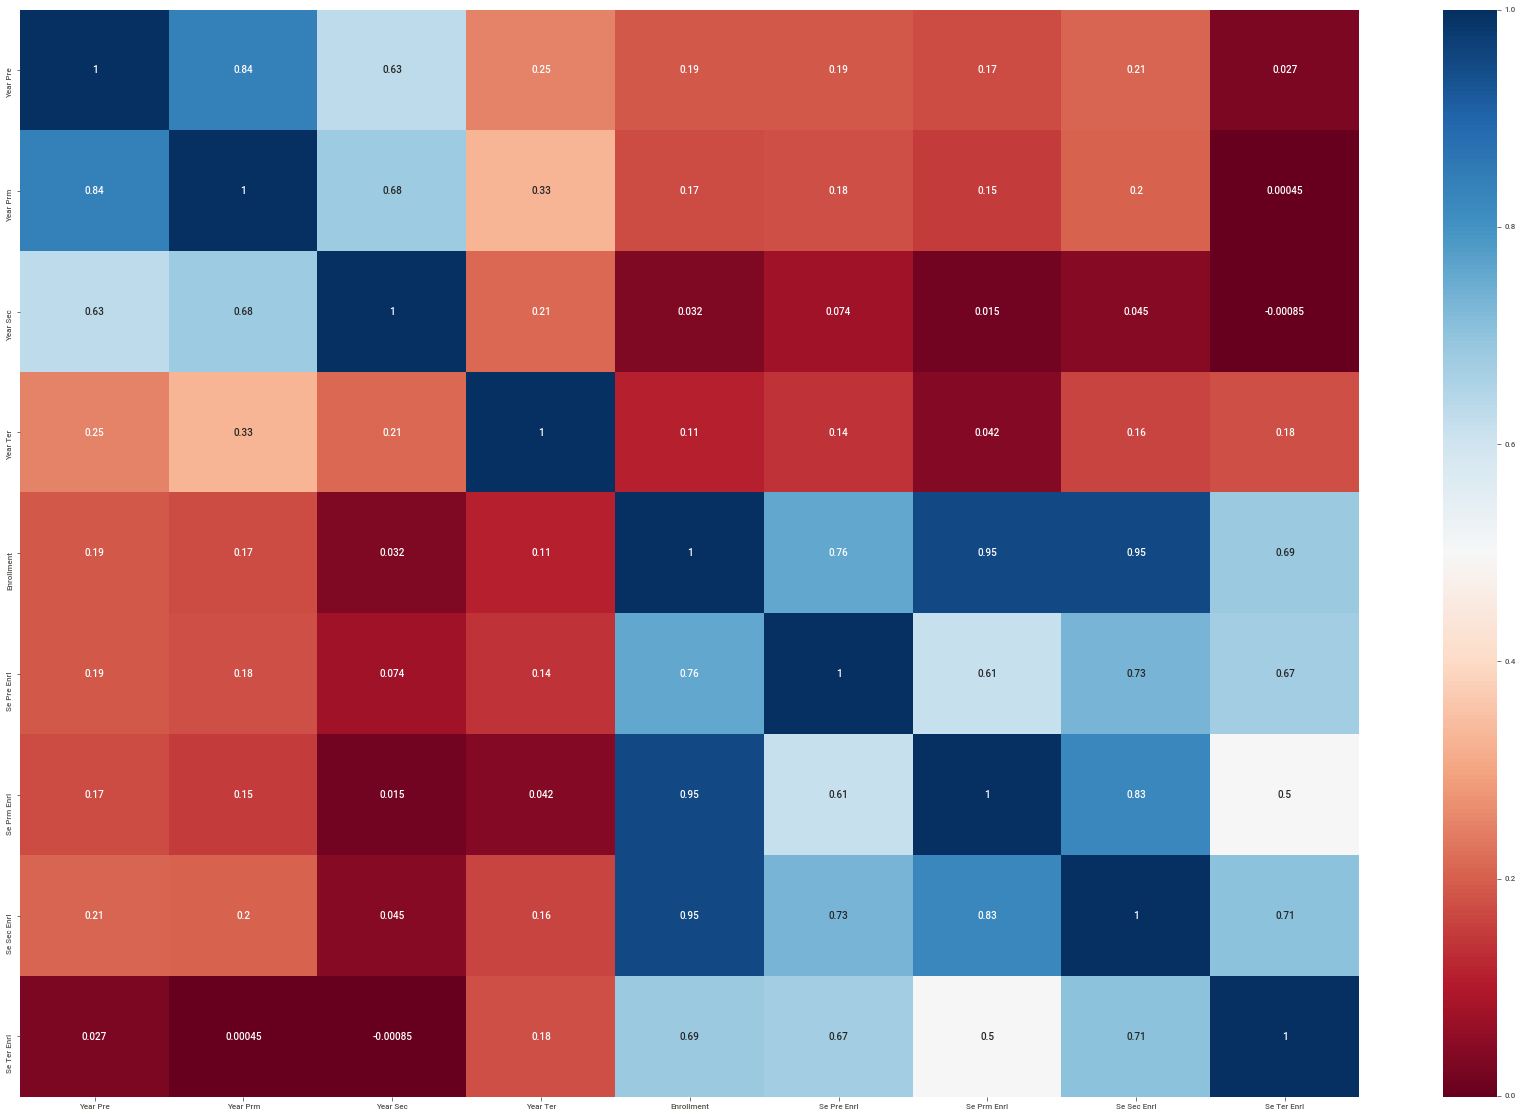

In [361]:
plt.figure(figsize=(30,20))
worldCorr = world_data.corr()
sns.heatmap(worldCorr,cmap='RdBu',annot=True)
worldCorr

## Sweetviz Report

In [362]:
import sweetviz as sv

In [363]:
world_report = sv.analyze(world_data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [630]:
world_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Sweetviz report shows Incomelevel is highly correlated with total enrollment and primary enrollments.

## Importing Broadband Data

In [364]:
broadband_data = pd.read_csv('Fixed broadband subscriptions.csv')

In [365]:
broadband_data.dtypes

Series Name      object
Series Code      object
Country Name     object
1990 [YR1990]    object
2000 [YR2000]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
dtype: object

## Renaming Columns

In [367]:
broadband_data=broadband_data.rename({'1990 [YR1990]': '1990', '2000 [YR2000]': '2000','2008 [YR2008]': '2008',
                                     '2009 [YR2009]': '2009','2010 [YR2010]': '2010','2011 [YR2011]': '2011',
                                     '2012 [YR2012]': '2012','2013 [YR2013]': '2013','2014 [YR2014]': '2014',
                                     '2015 [YR2015]': '2015','2016 [YR2016]': '2016','2017 [YR2017]': '2017',
                                     'Country Name': 'Countryname'}, axis=1)

In [368]:
broadband_data.dtypes

Series Name    object
Series Code    object
Countryname    object
1990           object
2000           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
dtype: object

## Rounding float values to 2 decimals

In [369]:
cols = ['1990','2000','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
broadband_data[cols] = broadband_data[cols].round(2)

In [370]:
broadband_data

Series Name     Series Code  \
0    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
1    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
2    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
3    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
4    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
5    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
6    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
7    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
8    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
9    Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
10   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
11   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
12   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
13   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
14   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
15   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
16   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
17   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
18   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
19   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
20   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
21   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
22   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
23   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
24   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
25   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
26   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
27   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
28   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
29   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
30   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
31   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
32   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
33   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
34   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
35   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
36   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
37   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
38   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
39   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
40   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
41   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
42   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
43   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
44   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
45   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
46   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
47   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
48   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
49   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
50   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
51   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
52   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
53   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
54   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND.P2   
55   Fixed broadband subscriptions (per 100 people)  IT.NET.BBND

## Converting columns to true float type

In [371]:
broadband_data[cols] =broadband_data[cols].replace('..', np.nan)

In [372]:
broadband_data[cols] = broadband_data[cols].astype('float64')

In [373]:
broadband_data = broadband_data.drop(['Series Name', 'Series Code'], axis=1)

In [374]:
broadband_data.dtypes

Countryname     object
1990           float64
2000           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
dtype: object

## Calculating Average of each country

In [375]:
broadband_data['Avg'] =broadband_data.iloc[:, 2:14].mean(axis=1,skipna=True)

In [376]:
broadband_data

Countryname  1990      2000  \
0                                          Afghanistan   NaN       NaN   
1                                              Albania   NaN       NaN   
2                                              Algeria   NaN       NaN   
3                                       American Samoa   NaN       NaN   
4                                              Andorra   NaN       NaN   
5                                               Angola   NaN       NaN   
6                                  Antigua and Barbuda   NaN       NaN   
7                                            Argentina   NaN       NaN   
8                                              Armenia   NaN       NaN   
9                                                Aruba   NaN       NaN   
10                                           Australia   NaN       NaN   
11                                             Austria   NaN  2.375234   
12                                          Azerbaijan   NaN       NaN   
13                                        Bahamas, The   NaN       NaN   
14                                             Bahrain   NaN       NaN   
15                                          Bangladesh   NaN       NaN   
16                                            Barbados   NaN       NaN   
17                                             Belarus   NaN       NaN   
18                                             Belgium   NaN  1.404457   
19                                              Belize   NaN       NaN   
20                                               Benin   NaN       NaN   
21                                             Bermuda   NaN       NaN   
22                                              Bhutan   NaN       NaN   
23                                             Bolivia   NaN       NaN   
24                              Bosnia and Herzegovina   NaN  0.000704   
25                                            Botswana   NaN       NaN   
26                                              Brazil   NaN  0.057305   
27                              British Virgin Islands   NaN       NaN   
28                                   Brunei Darussalam   NaN       NaN   
29                                            Bulgaria   NaN       NaN   
30                                        Burkina Faso   NaN       NaN   
31                                             Burundi   NaN       NaN   
32                                          Cabo Verde   NaN       NaN   
33                                            Cambodia   NaN       NaN   
34                                            Cameroon   NaN       NaN   
35                                              Canada   NaN  4.596255   
36                                      Cayman Islands   NaN       NaN   
37                            Central African Republic   NaN       NaN   
38                                                Chad   NaN       NaN   
39                                     Channel Islands   NaN       NaN   
40                                               Chile   NaN  0.049695   
41                                               China   NaN  0.001770   
42                                            Colombia   NaN  0.022237   
43                                             Comoros   NaN       NaN   
44                                    Congo, Dem. Rep.   NaN       NaN   
45                                         Congo, Rep.   NaN       NaN   
46                                          Costa Rica   NaN       NaN   
47                                       Cote d'Ivoire   NaN       NaN   
48                                             Croatia   NaN       NaN   
49                                                Cuba   NaN       NaN   
50                                             Curacao   NaN       NaN   
51                                              Cyprus   NaN       NaN   
52                                      Czech Republic   NaN  0.024389   
53                                             

<AxesSubplot:xlabel='Countryname'>

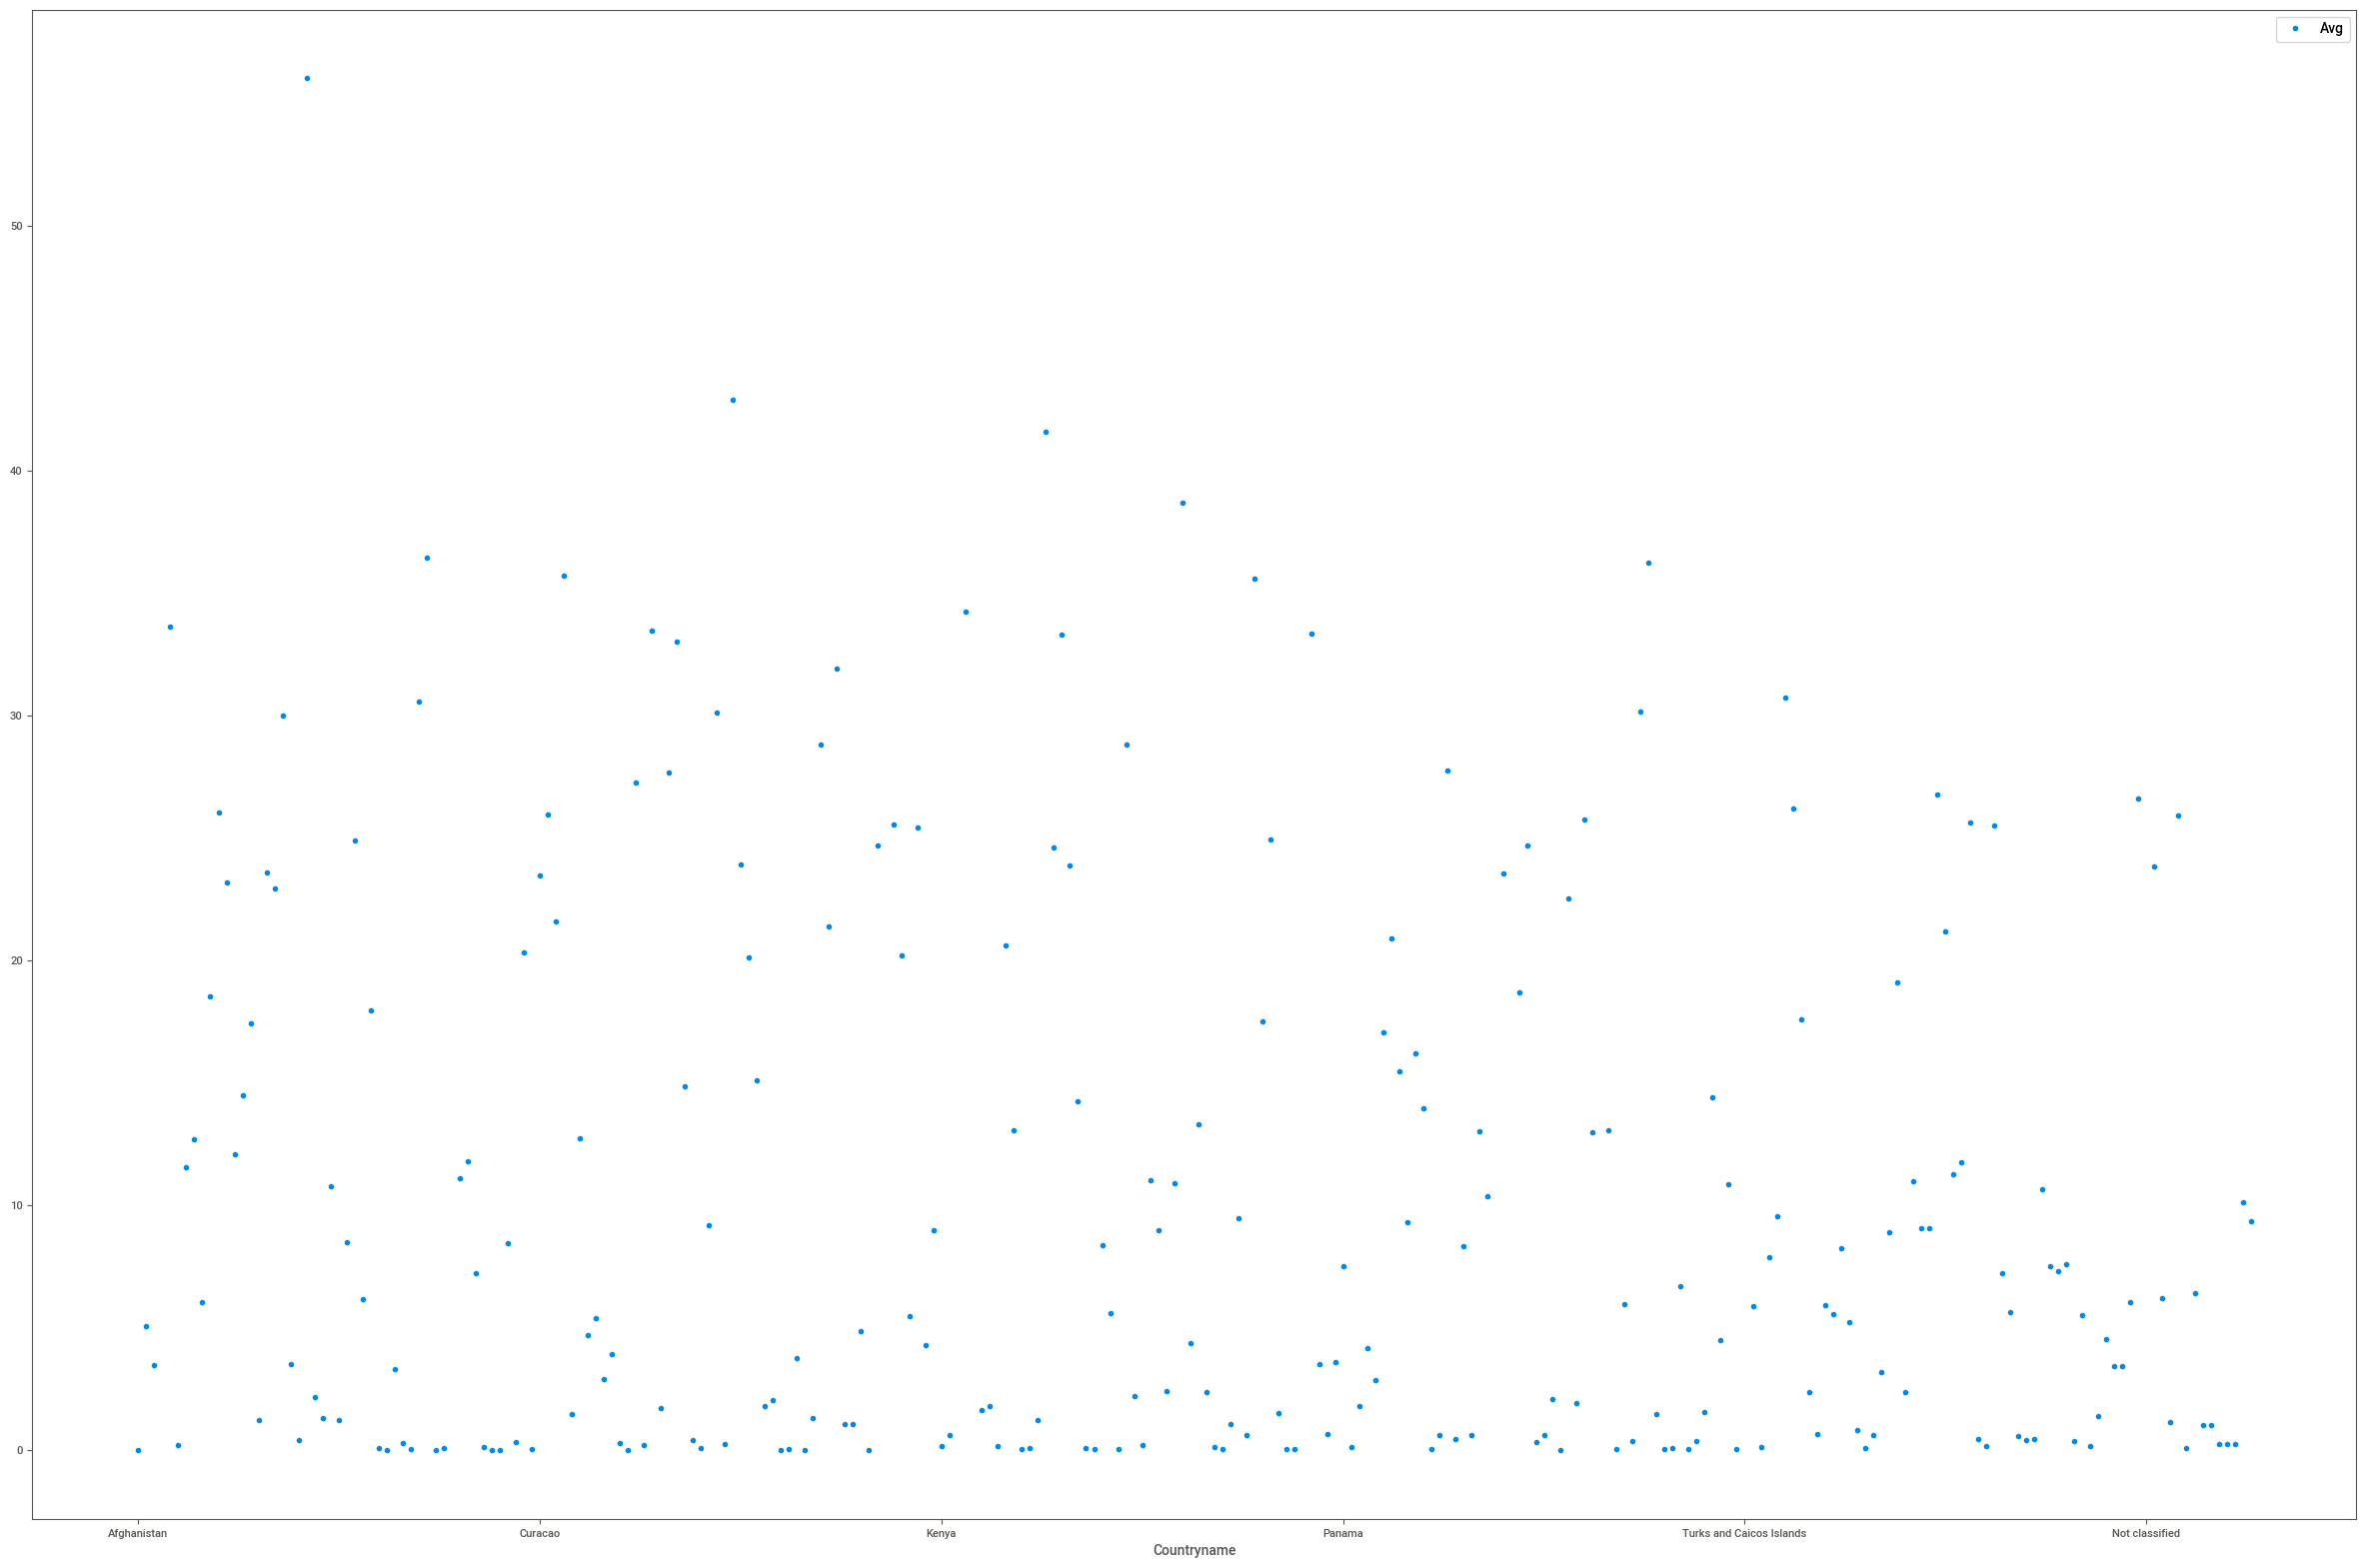

In [377]:
broadband_data.plot(x='Countryname', y='Avg',figsize=(30,20), style=['o'])

1990      2000      2008      2009      2010      2011      2012  \
1990   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000   NaN  1.000000  0.536685  0.528353  0.525634  0.521900  0.506314   
2008   NaN  0.536685  1.000000  0.993284  0.988627  0.974953  0.961315   
2009   NaN  0.528353  0.993284  1.000000  0.994351  0.983655  0.976198   
2010   NaN  0.525634  0.988627  0.994351  1.000000  0.994699  0.985929   
2011   NaN  0.521900  0.974953  0.983655  0.994699  1.000000  0.991569   
2012   NaN  0.506314  0.961315  0.976198  0.985929  0.991569  1.000000   
2013   NaN  0.489960  0.955860  0.969135  0.980804  0.987646  0.997854   
2014   NaN  0.483599  0.946289  0.956975  0.972713  0.983144  0.994071   
2015   NaN  0.473285  0.933199  0.941969  0.961268  0.976575  0.987774   
2016   NaN  0.477683  0.932582  0.948185  0.966139  0.973835  0.984956   
2017   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Avg    NaN  0.517451  0.969093  0.979390  0.989211  0.990928  0.995124   

          2013      2014      2015      2016  2017       Avg  
1990       NaN       NaN       NaN       NaN   NaN       NaN  
2000  0.489960  0.483599  0.473285  0.477683   NaN  0.517451  
2008  0.955860  0.946289  0.933199  0.932582   NaN  0.969093  
2009  0.969135  0.956975  0.941969  0.948185   NaN  0.979390  
2010  0.980804  0.972713  0.961268  0.966139   NaN  0.989211  
2011  0.987646  0.983144  0.976575  0.973835   NaN  0.990928  
2012  0.997854  0.994071  0.987774  0.984956   NaN  0.995124  
2013  1.000000  0.994646  0.986594  0.987843   NaN  0.994052  
2014  0.994646  1.000000  0.995495  0.992996   NaN  0.991921  
2015  0.986594  0.995495  1.000000  0.998029   NaN  0.985320  
2016  0.987843  0.992996  0.998029  1.000000   NaN  0.987820  
2017       NaN       NaN       NaN       NaN   NaN       NaN  
Avg   0.994052  0.991921  0.985320  0.987820   NaN  1.000000

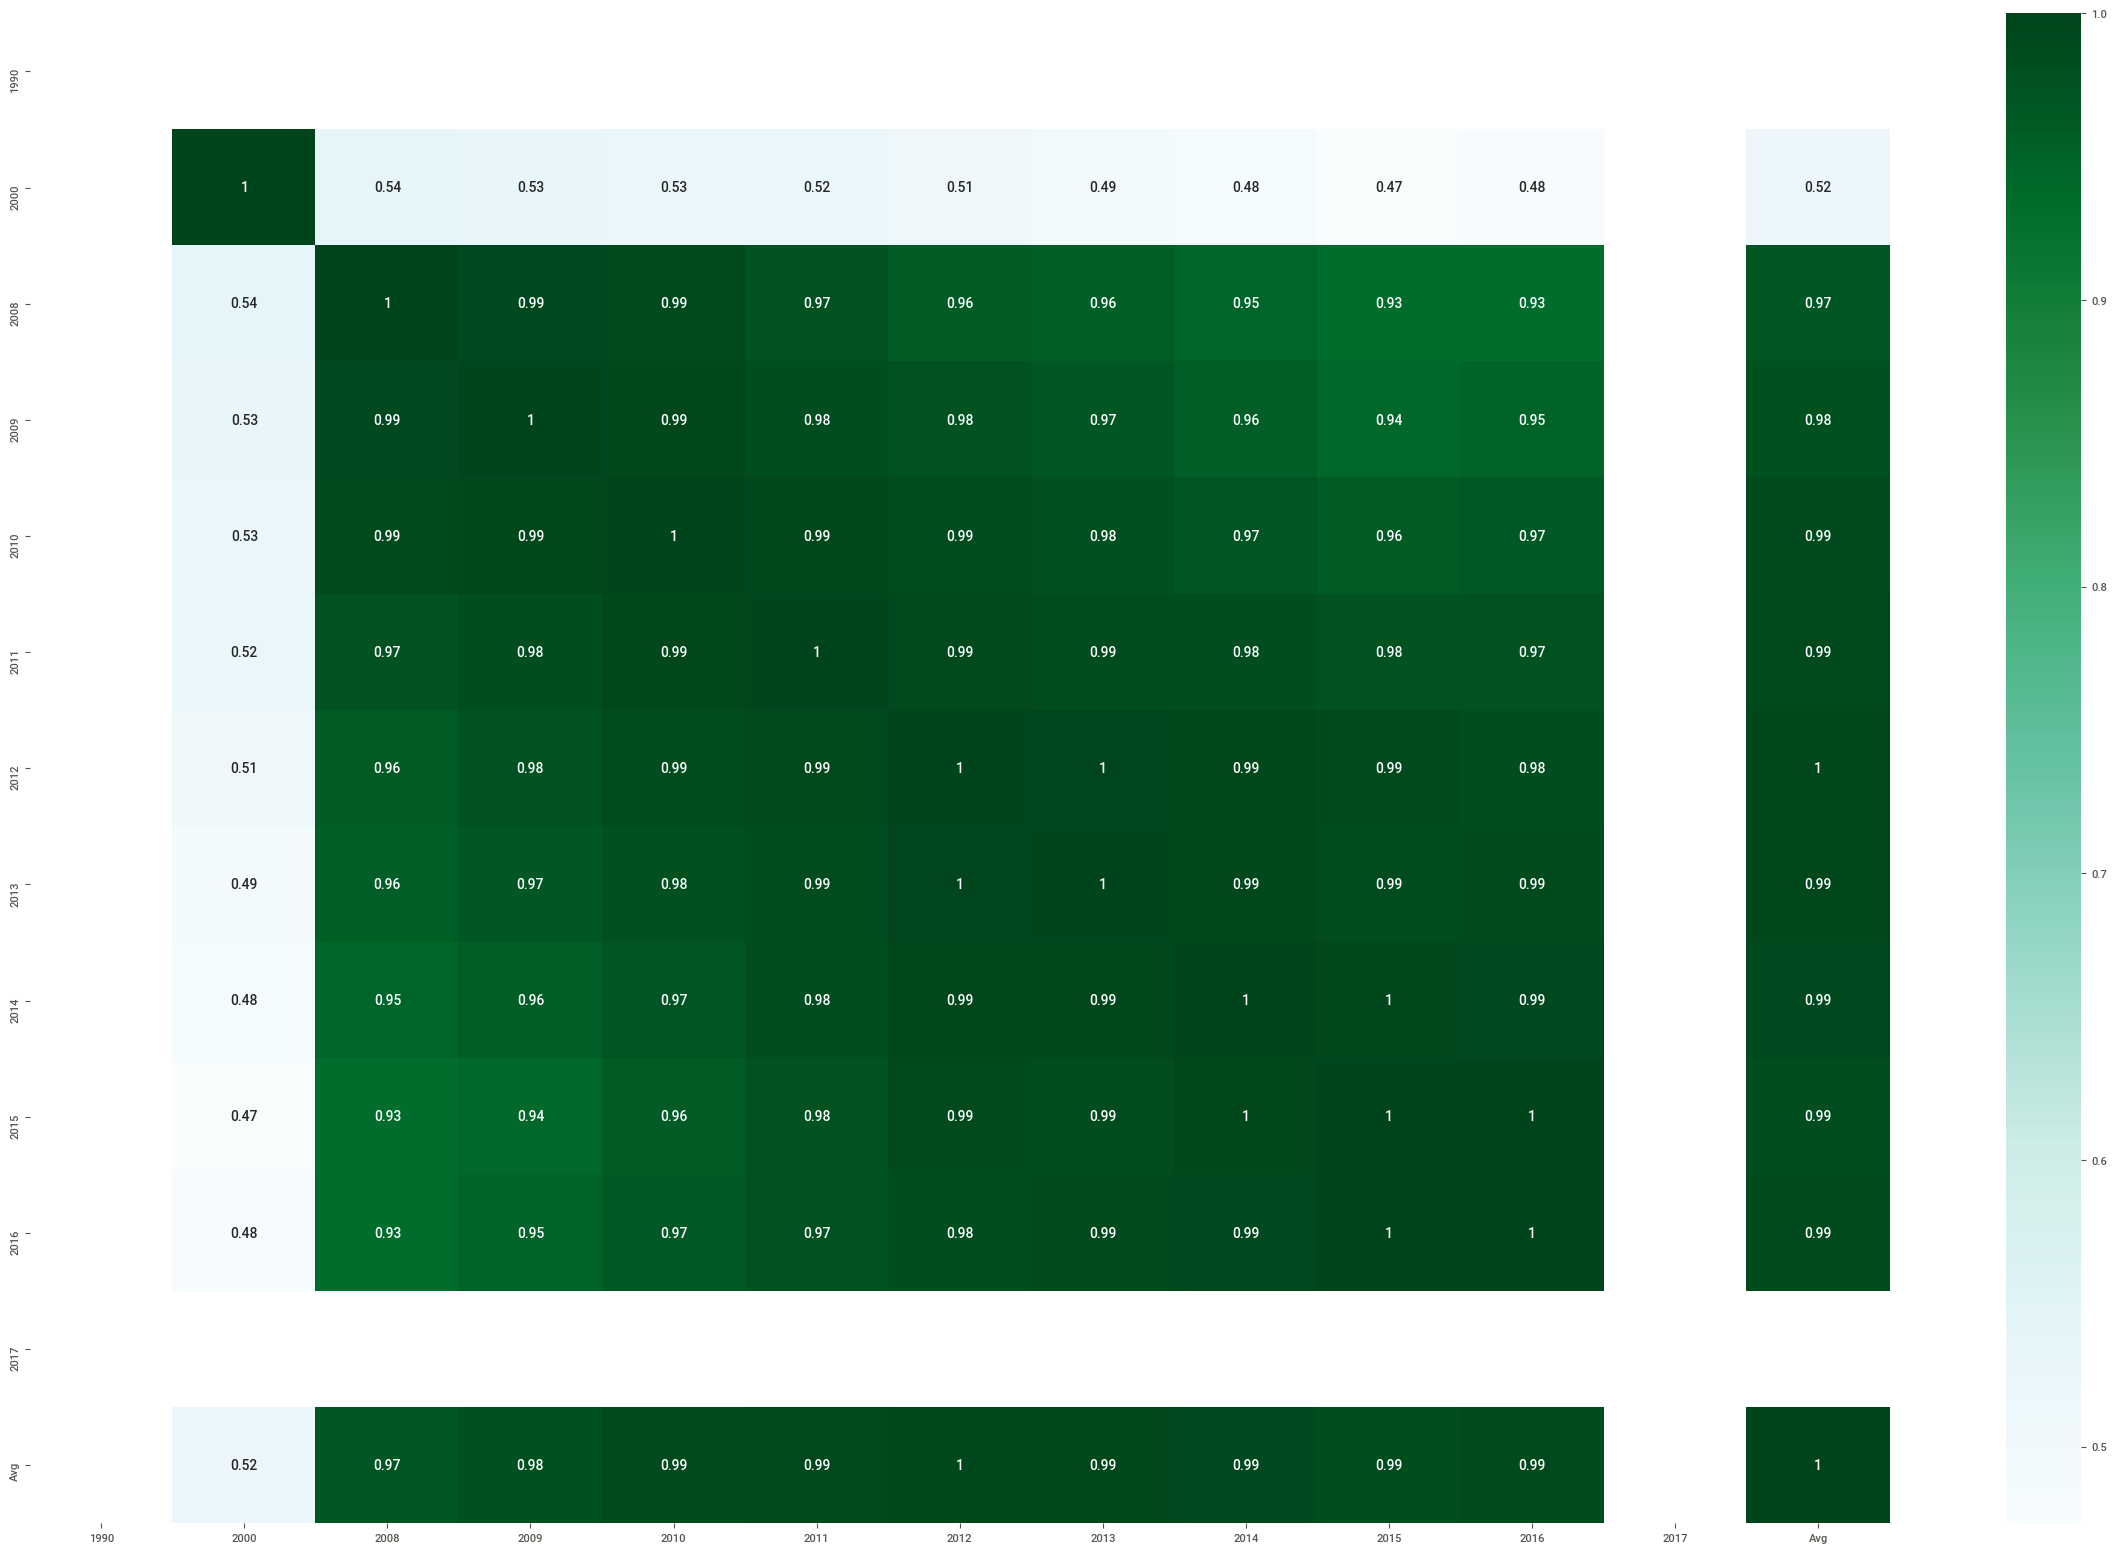

In [378]:
plt.figure(figsize=(30,20))
broadbandCorr = broadband_data.corr()
sns.heatmap(broadbandCorr,cmap='BuGn',annot=True)
broadbandCorr

## Importing Telephone Data

In [379]:
telephone_data = pd.read_csv('Fixed telephone subscriptions.csv')

In [380]:
telephone_data

Series Name     Series Code  \
0    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
1    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
2    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
3    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
4    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
5    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
6    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
7    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
8    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
9    Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
10   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
11   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
12   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
13   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
14   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
15   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
16   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
17   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
18   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
19   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
20   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
21   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
22   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
23   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
24   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
25   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
26   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
27   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
28   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
29   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
30   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
31   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
32   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
33   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
34   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
35   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
36   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
37   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
38   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
39   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
40   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
41   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
42   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
43   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
44   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
45   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
46   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
47   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
48   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
49   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
50   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
51   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
52   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
53   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
54   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN.P2   
55   Fixed telephone subscriptions (per 100 people)  IT.MLT.MAIN

In [382]:
telephone_data=telephone_data.rename({'1990 [YR1990]': '1990', '2000 [YR2000]': '2000','2008 [YR2008]': '2008',
                                     '2009 [YR2009]': '2009','2010 [YR2010]': '2010','2011 [YR2011]': '2011',
                                     '2012 [YR2012]': '2012','2013 [YR2013]': '2013','2014 [YR2014]': '2014',
                                     '2015 [YR2015]': '2015','2016 [YR2016]': '2016','2017 [YR2017]': '2017',
                                     'Country Name': 'Countryname'}, axis=1)

In [383]:
telephone_data.dtypes

Series Name    object
Series Code    object
Countryname    object
1990           object
2000           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
dtype: object

## Converting columns to true float type

In [384]:
colsT = ['1990','2000','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
telephone_data[colsT] = telephone_data[colsT].round(2)

In [385]:
telephone_data[colsT] =telephone_data[colsT].replace('..', np.nan)

In [386]:
telephone_data[colsT] = telephone_data[colsT].astype('float64')

In [387]:
telephone_data.dtypes

Series Name     object
Series Code     object
Countryname     object
1990           float64
2000           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
dtype: object

In [388]:
telephone_data = telephone_data.drop(['Series Name', 'Series Code'], axis=1)

In [389]:
telephone_data['Avg'] = telephone_data.iloc[:, 2:14].mean(axis=1,skipna=True)

In [390]:
telephone_data

Countryname       1990       2000  \
0                                          Afghanistan   0.308579   0.140808   
1                                              Albania   1.160469   4.619952   
2                                              Algeria   3.094547   5.552830   
3                                       American Samoa  11.691183  17.822746   
4                                              Andorra  39.445250  52.317314   
5                                               Angola   0.677386   0.466071   
6                                  Antigua and Barbuda  25.813330  49.325160   
7                                            Argentina   9.277375  21.391731   
8                                              Armenia  15.798256  17.339727   
9                                                Aruba  30.108773  41.933567   
10                                           Australia  45.545702  52.182373   
11                                             Austria  42.022954  49.836277   
12                                          Azerbaijan   8.591419   9.869740   
13                                        Bahamas, The  27.257761  38.402534   
14                                             Bahrain  18.952745  25.586055   
15                                          Bangladesh   0.203006   0.371122   
16                                            Barbados  27.817580  46.346046   
17                                             Belarus  15.342880  27.570165   
18                                             Belgium  39.211611  49.047873   
19                                              Belize   9.234772  14.985791   
20                                               Benin   0.295485   0.743147   
21                                             Bermuda  62.408442  89.235641   
22                                              Bhutan   0.349238   2.506423   
23                                             Bolivia   2.688913   6.012227   
24                              Bosnia and Herzegovina        NaN  20.342357   
25                                            Botswana   1.905251   7.741935   
26                                              Brazil   6.287407  17.722295   
27                              British Virgin Islands  39.358406  50.380274   
28                                   Brunei Darussalam  13.622440  24.261530   
29                                            Bulgaria  24.661553  36.020029   
30                                        Burkina Faso   0.183667   0.458453   
31                                             Burundi   0.141816   0.299658   
32                                          Cabo Verde   2.342880  12.350992   
33                                            Cambodia   0.034392   0.252641   
34                                            Cameroon   0.333196   0.596445   
35                                              Canada  55.303837  67.888430   
36                                      Cayman Islands  49.302251  83.963056   
37                            Central African Republic   0.171929   0.260230   
38                                                Chad   0.067646   0.123609   
39                                     Channel Islands        NaN        NaN   
40                                               Chile   6.539727  21.369303   
41                                               China   0.587792  11.310978   
42                                            Colombia   7.249918  18.027923   
43                                             Comoros   0.790959   1.282008   
44                                    Congo, Dem. Rep.   0.097392   0.020895   
45                                         Congo, Rep.   0.665133   0.703729   
46                                          Costa Rica   9.141736  22.870947   
47                                       Cote d'Ivoire   0.600480   1.634502   
48                                             Croatia  17.168758  38.459479   
49                                         

<AxesSubplot:xlabel='Countryname'>

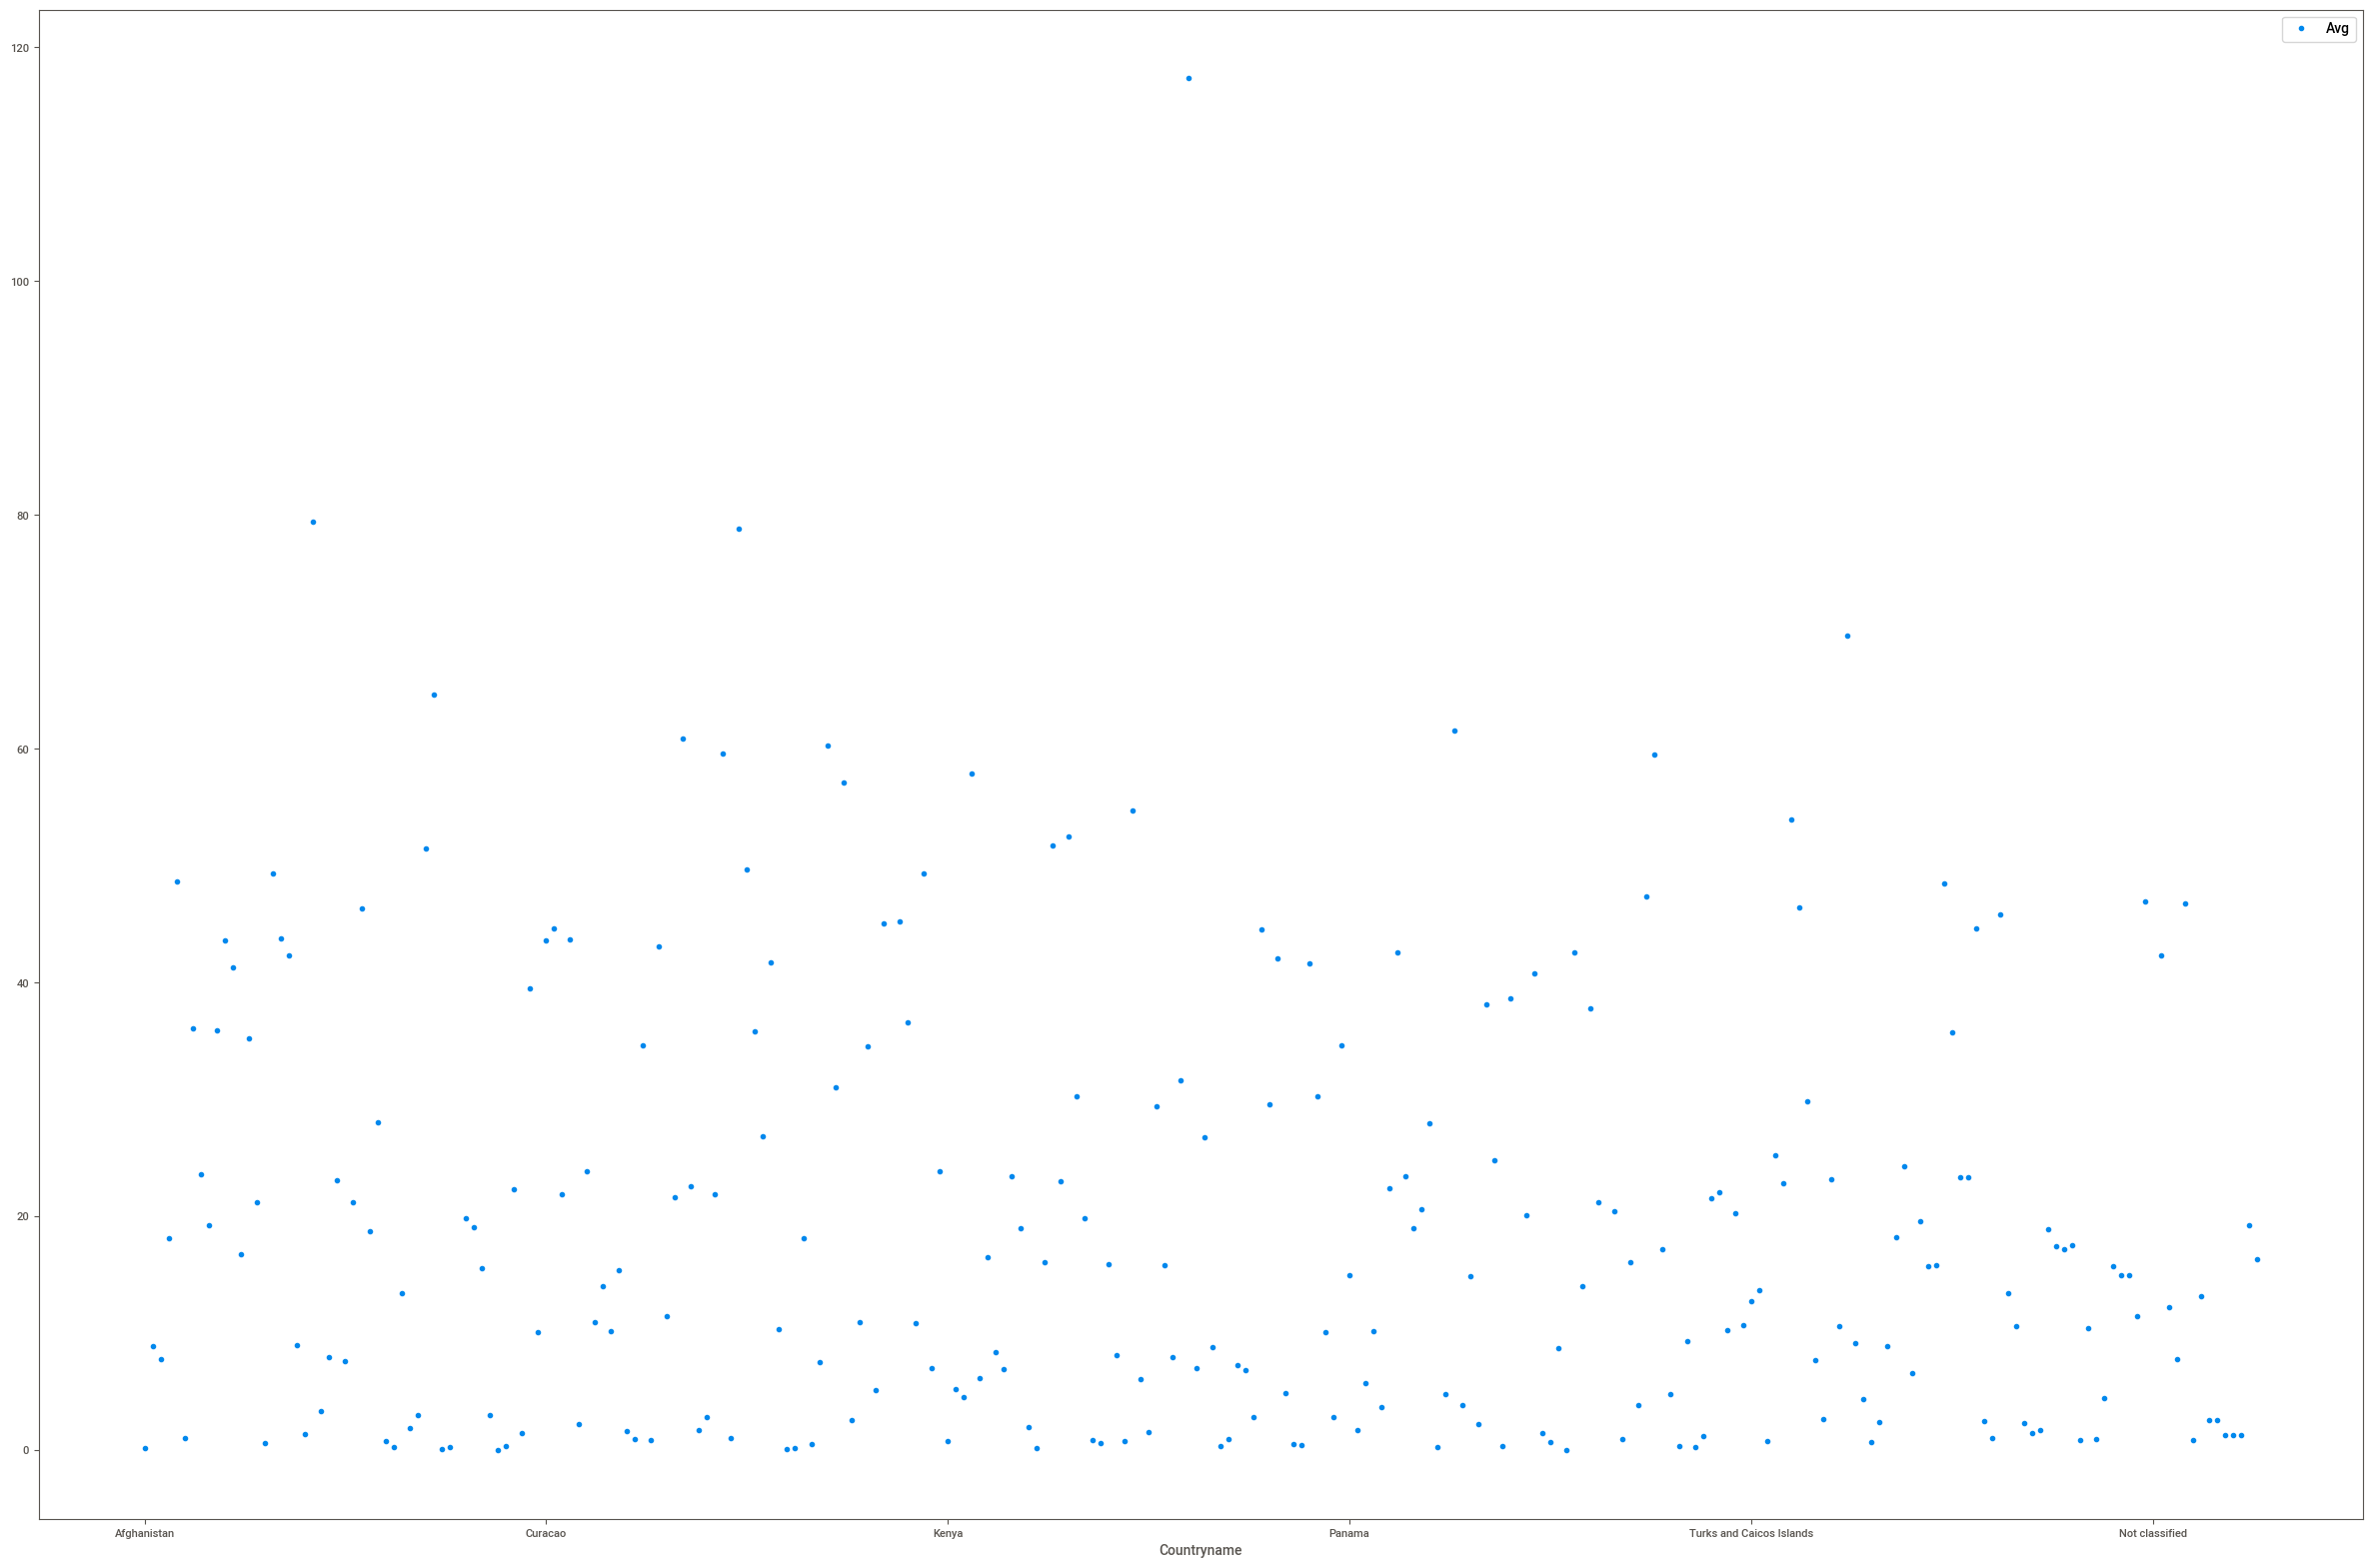

In [391]:
telephone_data.plot(x='Countryname', y='Avg',figsize=(30,20), style=['o'])

1990      2000      2008      2009      2010      2011      2012  \
1990  1.000000  0.962306  0.910769  0.907902  0.900265  0.887230  0.881442   
2000  0.962306  1.000000  0.962803  0.952121  0.944248  0.935257  0.926945   
2008  0.910769  0.962803  1.000000  0.993829  0.988614  0.982114  0.976180   
2009  0.907902  0.952121  0.993829  1.000000  0.995695  0.991505  0.985741   
2010  0.900265  0.944248  0.988614  0.995695  1.000000  0.997918  0.992957   
2011  0.887230  0.935257  0.982114  0.991505  0.997918  1.000000  0.997856   
2012  0.881442  0.926945  0.976180  0.985741  0.992957  0.997856  1.000000   
2013  0.874422  0.916184  0.968925  0.979772  0.987485  0.994153  0.998027   
2014  0.863644  0.905134  0.951993  0.966167  0.973484  0.986144  0.972298   
2015  0.846062  0.882025  0.928949  0.945696  0.951774  0.981174  0.945537   
2016  0.855354  0.898089  0.946617  0.961475  0.968879  0.974069  0.980401   
2017       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Avg   0.906496  0.950751  0.987299  0.993553  0.996181  0.996835  0.993024   

          2013      2014      2015      2016  2017       Avg  
1990  0.874422  0.863644  0.846062  0.855354   NaN  0.906496  
2000  0.916184  0.905134  0.882025  0.898089   NaN  0.950751  
2008  0.968925  0.951993  0.928949  0.946617   NaN  0.987299  
2009  0.979772  0.966167  0.945696  0.961475   NaN  0.993553  
2010  0.987485  0.973484  0.951774  0.968879   NaN  0.996181  
2011  0.994153  0.986144  0.981174  0.974069   NaN  0.996835  
2012  0.998027  0.972298  0.945537  0.980401   NaN  0.993024  
2013  1.000000  0.971565  0.945765  0.986789   NaN  0.989778  
2014  0.971565  1.000000  0.993679  0.991849   NaN  0.984612  
2015  0.945765  0.993679  1.000000  0.996164   NaN  0.967084  
2016  0.986789  0.991849  0.996164  1.000000   NaN  0.981459  
2017       NaN       NaN       NaN       NaN   NaN       NaN  
Avg   0.989778  0.984612  0.967084  0.981459   NaN  1.000000

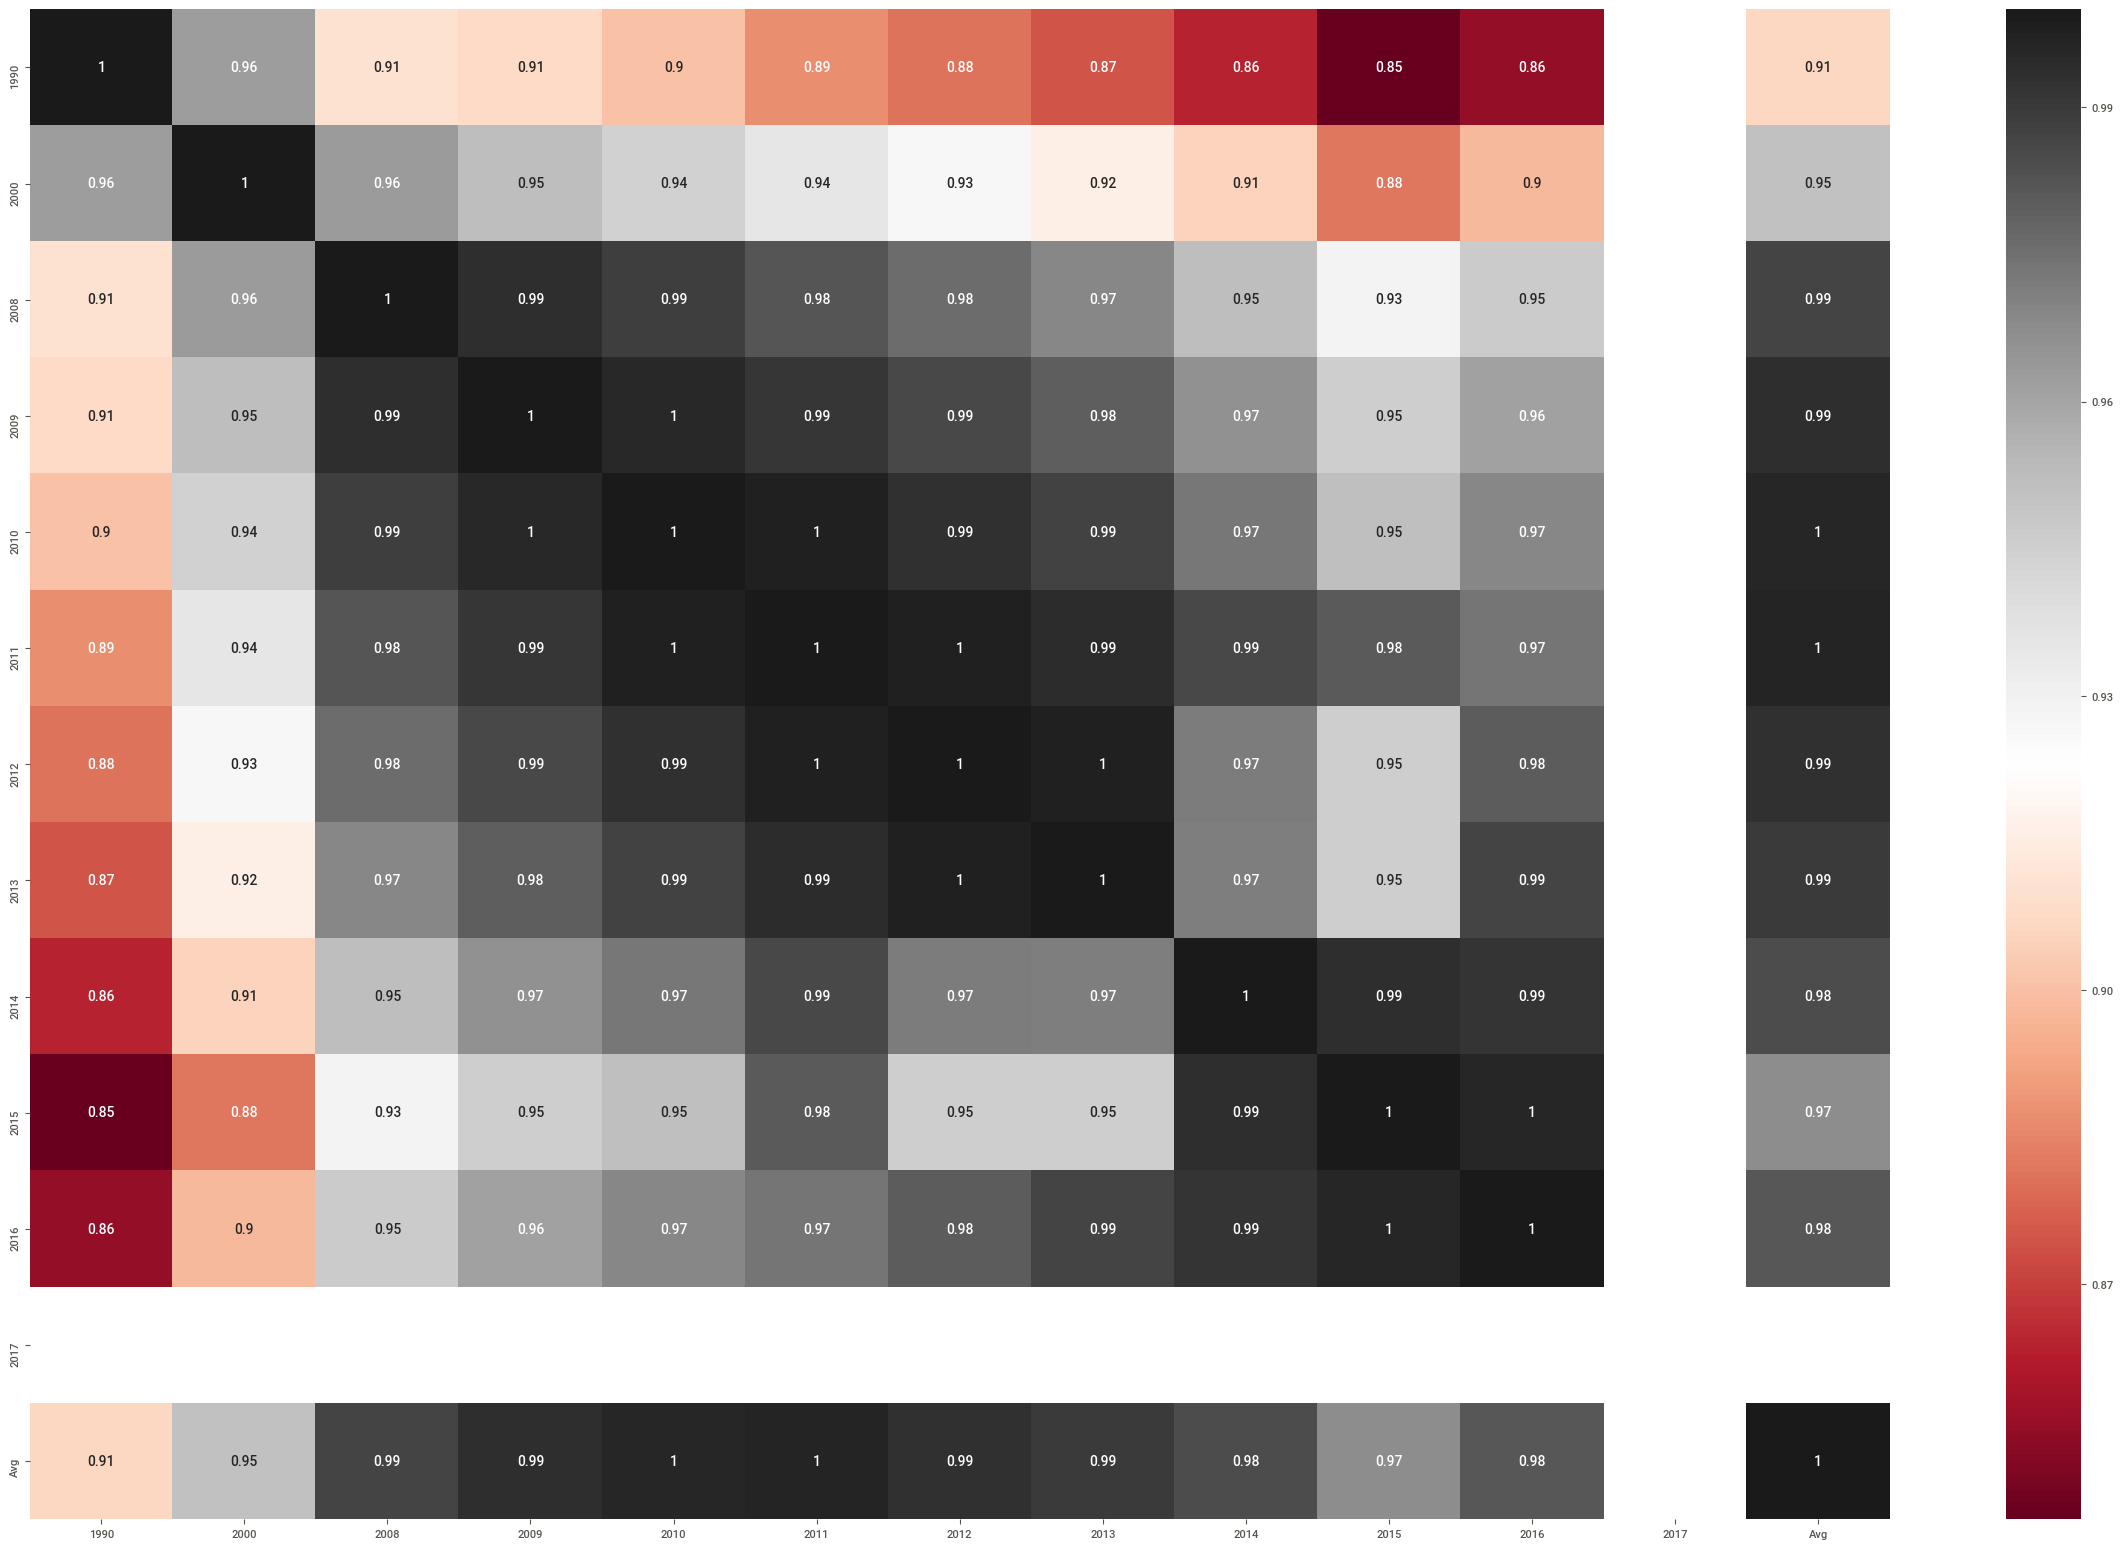

In [392]:
plt.figure(figsize=(30,20))
telephoneCorr = telephone_data.corr()
sns.heatmap(telephoneCorr,cmap='RdGy',annot=True)
telephoneCorr

## Merging all datasets

In [522]:
merged_data1 = pd.merge(world_data, broadband_data, on=['Countryname'], how='inner')
merged_data1

Countryname Ifcloseddate      Incomelevelname  \
0                           Eritrea          NaN           Low income   
1                          Bulgaria          NaN  Upper middle income   
2                West Bank and Gaza   05/03/2020  Lower middle income   
3                            Bhutan   09/03/2020  Lower middle income   
4                            Panama   11/03/2020          High income   
5                        Costa Rica   12/03/2020  Upper middle income   
6                       El Salvador   12/03/2020  Lower middle income   
7                           Bolivia   03/13/2020  Lower middle income   
8                           Ecuador   03/13/2020  Upper middle income   
9                          Honduras   03/13/2020  Lower middle income   
10                           Israel   03/13/2020          High income   
11                        Sri Lanka   03/13/2020  Upper middle income   
12                           Greece   11/14/2020          High income   
13                       Mauritania   03/14/2020  Lower middle income   
14                            Sudan   03/14/2020  Lower middle income   
15                          Senegal   03/14/2020  Lower middle income   
16                          Austria   11/15/2020          High income   
17                           Jordan   03/15/2020  Upper middle income   
18                           Rwanda   03/15/2020           Low income   
19               Dominican Republic   03/16/2020  Upper middle income   
20                        Guatemala   03/16/2020  Upper middle income   
21                      Puerto Rico   03/16/2020          High income   
22                             Mali   03/19/2020           Low income   
23                        Mauritius   03/19/2020  Upper middle income   
24            Sao Tome and Principe   03/19/2020  Lower middle income   
25                            Nepal   03/20/2020           Low income   
26                       Seychelles   03/20/2020          High income   
27                          Lesotho   03/22/2020  Lower middle income   
28                       Madagascar   03/23/2020           Low income   
29         Central African Republic   03/24/2020           Low income   
30                          Myanmar          NaN  Lower middle income   
31                          Morocco   03/16/2020  Lower middle income   
32           Bosnia and Herzegovina          NaN  Upper middle income   
33                          Belarus          NaN  Upper middle income   
34                Brunei Darussalam          NaN          High income   
35                          Liberia          NaN           Low income   
36                          Moldova          NaN  Lower middle income   
37                           Sweden          NaN          High income   
38                       San Marino   01/03/2020          High income   
39             Hong Kong SAR, China   02/10/2020          High income   
40                          Lao PDR   03/18/2020  Lower middle income   
41                      New Zealand   03/24/2020          High income   
42                         Portugal   08/03/2020          High income   
43                          Albania   09/03/2020  Upper middle income   
44                          Iceland   09/03/2020          High income   
45                           Kuwait   01/03/2020          High income   
46                      Yemen, Rep.   01/03/2020           Low income   
47                          Hungary   10/03/2020          High income   
48                       Azerbaijan   11/03/2020  Upper middle income   
49                           Cyprus   11/03/2020          High income   
50                   Czech Republic   11/03/2020          High income   
51                          Romania   11/03/2020  Upper middle income   
52                          Belgium   12/03/2020          High income   
53                          Denmark   12/03/2020          High income   
54       

In [523]:
final_data = pd.merge(merged_data1, telephone_data, on=['Countryname'], how='inner')
final_data

Countryname Ifcloseddate      Incomelevelname  \
0                           Eritrea          NaN           Low income   
1                          Bulgaria          NaN  Upper middle income   
2                West Bank and Gaza   05/03/2020  Lower middle income   
3                            Bhutan   09/03/2020  Lower middle income   
4                            Panama   11/03/2020          High income   
5                        Costa Rica   12/03/2020  Upper middle income   
6                       El Salvador   12/03/2020  Lower middle income   
7                           Bolivia   03/13/2020  Lower middle income   
8                           Ecuador   03/13/2020  Upper middle income   
9                          Honduras   03/13/2020  Lower middle income   
10                           Israel   03/13/2020          High income   
11                        Sri Lanka   03/13/2020  Upper middle income   
12                           Greece   11/14/2020          High income   
13                       Mauritania   03/14/2020  Lower middle income   
14                            Sudan   03/14/2020  Lower middle income   
15                          Senegal   03/14/2020  Lower middle income   
16                          Austria   11/15/2020          High income   
17                           Jordan   03/15/2020  Upper middle income   
18                           Rwanda   03/15/2020           Low income   
19               Dominican Republic   03/16/2020  Upper middle income   
20                        Guatemala   03/16/2020  Upper middle income   
21                      Puerto Rico   03/16/2020          High income   
22                             Mali   03/19/2020           Low income   
23                        Mauritius   03/19/2020  Upper middle income   
24            Sao Tome and Principe   03/19/2020  Lower middle income   
25                            Nepal   03/20/2020           Low income   
26                       Seychelles   03/20/2020          High income   
27                          Lesotho   03/22/2020  Lower middle income   
28                       Madagascar   03/23/2020           Low income   
29         Central African Republic   03/24/2020           Low income   
30                          Myanmar          NaN  Lower middle income   
31                          Morocco   03/16/2020  Lower middle income   
32           Bosnia and Herzegovina          NaN  Upper middle income   
33                          Belarus          NaN  Upper middle income   
34                Brunei Darussalam          NaN          High income   
35                          Liberia          NaN           Low income   
36                          Moldova          NaN  Lower middle income   
37                           Sweden          NaN          High income   
38                       San Marino   01/03/2020          High income   
39             Hong Kong SAR, China   02/10/2020          High income   
40                          Lao PDR   03/18/2020  Lower middle income   
41                      New Zealand   03/24/2020          High income   
42                         Portugal   08/03/2020          High income   
43                          Albania   09/03/2020  Upper middle income   
44                          Iceland   09/03/2020          High income   
45                           Kuwait   01/03/2020          High income   
46                      Yemen, Rep.   01/03/2020           Low income   
47                          Hungary   10/03/2020          High income   
48                       Azerbaijan   11/03/2020  Upper middle income   
49                           Cyprus   11/03/2020          High income   
50                   Czech Republic   11/03/2020          High income   
51                          Romania   11/03/2020  Upper middle income   
52                          Belgium   12/03/2020          High income   
53                          Denmark   12/03/2020          High income   
54       

In [524]:
final_data.dtypes

Countryname         object
Ifcloseddate        object
Incomelevelname     object
Regionname          object
Schoolstatus        object
Year Pre           float64
Year Prm           float64
Year Sec           float64
Year Ter           float64
Enrollment           int64
Se Pre Enrl          int64
Se Prm Enrl          int64
Se Sec Enrl          int64
Se Ter Enrl          int64
1990_x             float64
2000_x             float64
2008_x             float64
2009_x             float64
2010_x             float64
2011_x             float64
2012_x             float64
2013_x             float64
2014_x             float64
2015_x             float64
2016_x             float64
2017_x             float64
Avg_x              float64
1990_y             float64
2000_y             float64
2008_y             float64
2009_y             float64
2010_y             float64
2011_y             float64
2012_y             float64
2013_y             float64
2014_y             float64
2015_y             float64
2

In [525]:
for i in range(len(final_data.index)) : 
    print(" Total NaN in row", i + 1, ":", 
          final_data.iloc[i].isnull().sum()) 

 Total NaN in row 1 : 6
 Total NaN in row 2 : 5
 Total NaN in row 3 : 8
 Total NaN in row 4 : 4
 Total NaN in row 5 : 4
 Total NaN in row 6 : 4
 Total NaN in row 7 : 4
 Total NaN in row 8 : 5
 Total NaN in row 9 : 4
 Total NaN in row 10 : 6
 Total NaN in row 11 : 4
 Total NaN in row 12 : 4
 Total NaN in row 13 : 4
 Total NaN in row 14 : 4
 Total NaN in row 15 : 5
 Total NaN in row 16 : 4
 Total NaN in row 17 : 3
 Total NaN in row 18 : 4
 Total NaN in row 19 : 4
 Total NaN in row 20 : 4
 Total NaN in row 21 : 5
 Total NaN in row 22 : 4
 Total NaN in row 23 : 4
 Total NaN in row 24 : 4
 Total NaN in row 25 : 4
 Total NaN in row 26 : 4
 Total NaN in row 27 : 4
 Total NaN in row 28 : 4
 Total NaN in row 29 : 4
 Total NaN in row 30 : 10
 Total NaN in row 31 : 8
 Total NaN in row 32 : 4
 Total NaN in row 33 : 5
 Total NaN in row 34 : 5
 Total NaN in row 35 : 5
 Total NaN in row 36 : 5
 Total NaN in row 37 : 5
 Total NaN in row 38 : 4
 Total NaN in row 39 : 4
 Total NaN in row 40 : 3
 Total N

In [526]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      final_data.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 Countryname          0
Ifcloseddate        15
Incomelevelname      0
Regionname           0
Schoolstatus         0
Year Pre             0
Year Prm             0
Year Sec             0
Year Ter             3
Enrollment           0
Se Pre Enrl          0
Se Prm Enrl          0
Se Sec Enrl          0
Se Ter Enrl          0
1990_x             106
2000_x              86
2008_x               7
2009_x               7
2010_x               5
2011_x               5
2012_x               4
2013_x               4
2014_x               4
2015_x               2
2016_x               2
2017_x             106
Avg_x                1
1990_y               6
2000_y               2
2008_y               2
2009_y               1
2010_y               1
2011_y               2
2012_y               1
2013_y               1
2014_y               0
2015_y               2
2016_y               3
2017_y             106
Avg_y                0
dtype: int64


In [527]:
final_data = final_data.drop(['1990_x','2017_x','2017_y'], axis=1)

In [528]:
final_data.dtypes

Countryname         object
Ifcloseddate        object
Incomelevelname     object
Regionname          object
Schoolstatus        object
Year Pre           float64
Year Prm           float64
Year Sec           float64
Year Ter           float64
Enrollment           int64
Se Pre Enrl          int64
Se Prm Enrl          int64
Se Sec Enrl          int64
Se Ter Enrl          int64
2000_x             float64
2008_x             float64
2009_x             float64
2010_x             float64
2011_x             float64
2012_x             float64
2013_x             float64
2014_x             float64
2015_x             float64
2016_x             float64
Avg_x              float64
1990_y             float64
2000_y             float64
2008_y             float64
2009_y             float64
2010_y             float64
2011_y             float64
2012_y             float64
2013_y             float64
2014_y             float64
2015_y             float64
2016_y             float64
Avg_y              float64
d

In [529]:
from sklearn.preprocessing import LabelEncoder

In [530]:
final_data['Incomelevelname'].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income'], dtype=object)

In [531]:
final_data = pd.get_dummies(final_data, columns=['Incomelevelname'])

In [532]:
final_data

Countryname Ifcloseddate  \
0                           Eritrea          NaN   
1                          Bulgaria          NaN   
2                West Bank and Gaza   05/03/2020   
3                            Bhutan   09/03/2020   
4                            Panama   11/03/2020   
5                        Costa Rica   12/03/2020   
6                       El Salvador   12/03/2020   
7                           Bolivia   03/13/2020   
8                           Ecuador   03/13/2020   
9                          Honduras   03/13/2020   
10                           Israel   03/13/2020   
11                        Sri Lanka   03/13/2020   
12                           Greece   11/14/2020   
13                       Mauritania   03/14/2020   
14                            Sudan   03/14/2020   
15                          Senegal   03/14/2020   
16                          Austria   11/15/2020   
17                           Jordan   03/15/2020   
18                           Rwanda   03/15/2020   
19               Dominican Republic   03/16/2020   
20                        Guatemala   03/16/2020   
21                      Puerto Rico   03/16/2020   
22                             Mali   03/19/2020   
23                        Mauritius   03/19/2020   
24            Sao Tome and Principe   03/19/2020   
25                            Nepal   03/20/2020   
26                       Seychelles   03/20/2020   
27                          Lesotho   03/22/2020   
28                       Madagascar   03/23/2020   
29         Central African Republic   03/24/2020   
30                          Myanmar          NaN   
31                          Morocco   03/16/2020   
32           Bosnia and Herzegovina          NaN   
33                          Belarus          NaN   
34                Brunei Darussalam          NaN   
35                          Liberia          NaN   
36                          Moldova          NaN   
37                           Sweden          NaN   
38                       San Marino   01/03/2020   
39             Hong Kong SAR, China   02/10/2020   
40                          Lao PDR   03/18/2020   
41                      New Zealand   03/24/2020   
42                         Portugal   08/03/2020   
43                          Albania   09/03/2020   
44                          Iceland   09/03/2020   
45                           Kuwait   01/03/2020   
46                      Yemen, Rep.   01/03/2020   
47                          Hungary   10/03/2020   
48                       Azerbaijan   11/03/2020   
49                           Cyprus   11/03/2020   
50                   Czech Republic   11/03/2020   
51                          Romania   11/03/2020   
52                          Belgium   12/03/2020   
53                          Denmark   12/03/2020   
54                          Ireland   12/03/2020   
55                        Lithuania   12/03/2020   
56                           Latvia   12/03/2020   
57                           Norway   12/03/2020   
58                          Armenia   03/13/2020   
59                          Estonia   03/13/2020   
60                          Jamaica   03/13/2020   
61                       Montenegro   03/13/2020   
62                             Oman   03/15/2020   
63              Antigua and Barbuda   03/16/2020   
64                           Belize   03/16/2020   
65                          Finland   03/16/2020   
66                          Grenada   03/16/2020   
67                          Croatia   03/16/2020   
68                       Kazakhstan   03/16/2020   
69                  Kyrgyz Republic   03/16/2020   
70                        St. Lucia   03/16/2020   
71                       Luxembourg   03/16/2020   
72                      Netherlands   03/16/2020   
73                           Serbia   03/16/2020   
74                  Slovak Republic   03/16/2020   
75                         Slovenia   03/16/2020   
76                  

In [533]:
final_data_encoded1 = pd.get_dummies(final_data, columns=['Incomelevelname_High income','Incomelevelname_Low income',
                                                         'Incomelevelname_Lower middle income','Incomelevelname_Upper middle income'])
final_data_encoded1

Countryname Ifcloseddate  \
0                           Eritrea          NaN   
1                          Bulgaria          NaN   
2                West Bank and Gaza   05/03/2020   
3                            Bhutan   09/03/2020   
4                            Panama   11/03/2020   
5                        Costa Rica   12/03/2020   
6                       El Salvador   12/03/2020   
7                           Bolivia   03/13/2020   
8                           Ecuador   03/13/2020   
9                          Honduras   03/13/2020   
10                           Israel   03/13/2020   
11                        Sri Lanka   03/13/2020   
12                           Greece   11/14/2020   
13                       Mauritania   03/14/2020   
14                            Sudan   03/14/2020   
15                          Senegal   03/14/2020   
16                          Austria   11/15/2020   
17                           Jordan   03/15/2020   
18                           Rwanda   03/15/2020   
19               Dominican Republic   03/16/2020   
20                        Guatemala   03/16/2020   
21                      Puerto Rico   03/16/2020   
22                             Mali   03/19/2020   
23                        Mauritius   03/19/2020   
24            Sao Tome and Principe   03/19/2020   
25                            Nepal   03/20/2020   
26                       Seychelles   03/20/2020   
27                          Lesotho   03/22/2020   
28                       Madagascar   03/23/2020   
29         Central African Republic   03/24/2020   
30                          Myanmar          NaN   
31                          Morocco   03/16/2020   
32           Bosnia and Herzegovina          NaN   
33                          Belarus          NaN   
34                Brunei Darussalam          NaN   
35                          Liberia          NaN   
36                          Moldova          NaN   
37                           Sweden          NaN   
38                       San Marino   01/03/2020   
39             Hong Kong SAR, China   02/10/2020   
40                          Lao PDR   03/18/2020   
41                      New Zealand   03/24/2020   
42                         Portugal   08/03/2020   
43                          Albania   09/03/2020   
44                          Iceland   09/03/2020   
45                           Kuwait   01/03/2020   
46                      Yemen, Rep.   01/03/2020   
47                          Hungary   10/03/2020   
48                       Azerbaijan   11/03/2020   
49                           Cyprus   11/03/2020   
50                   Czech Republic   11/03/2020   
51                          Romania   11/03/2020   
52                          Belgium   12/03/2020   
53                          Denmark   12/03/2020   
54                          Ireland   12/03/2020   
55                        Lithuania   12/03/2020   
56                           Latvia   12/03/2020   
57                           Norway   12/03/2020   
58                          Armenia   03/13/2020   
59                          Estonia   03/13/2020   
60                          Jamaica   03/13/2020   
61                       Montenegro   03/13/2020   
62                             Oman   03/15/2020   
63              Antigua and Barbuda   03/16/2020   
64                           Belize   03/16/2020   
65                          Finland   03/16/2020   
66                          Grenada   03/16/2020   
67                          Croatia   03/16/2020   
68                       Kazakhstan   03/16/2020   
69                  Kyrgyz Republic   03/16/2020   
70                        St. Lucia   03/16/2020   
71                       Luxembourg   03/16/2020   
72                      Netherlands   03/16/2020   
73                           Serbia   03/16/2020   
74                  Slovak Republic   03/16/2020   
75                         Slovenia   03/16/2020   
76                  

In [534]:
final_data_encoded1 = final_data_encoded1.drop(['Countryname','Ifcloseddate','Regionname','Schoolstatus'],axis=1)
                       #  'Year Pre','Year Prm','Year Sec','Year Ter','Enrollment','Se Pre Enrl','Se Prm Enrl',
                        # 'Se Sec Enrl','Se Ter Enrl','2000_x','2008_x','2009_x','2010_x','2011_x','2012_x',
                         #'2013_x','2014_x','2015_x','2016_x','Avg_x','1990_y','2000_y','2008_y','2009_y','2010_y',
                         #'2011_y','2012_y','2013_y','2014_y','2015_y','2016_y','Avg_y']

In [535]:
final_data_encoded1.dtypes

Year Pre                                 float64
Year Prm                                 float64
Year Sec                                 float64
Year Ter                                 float64
Enrollment                                 int64
Se Pre Enrl                                int64
Se Prm Enrl                                int64
Se Sec Enrl                                int64
Se Ter Enrl                                int64
2000_x                                   float64
2008_x                                   float64
2009_x                                   float64
2010_x                                   float64
2011_x                                   float64
2012_x                                   float64
2013_x                                   float64
2014_x                                   float64
2015_x                                   float64
2016_x                                   float64
Avg_x                                    float64
1990_y              

array([[<AxesSubplot:title={'center':'Year Pre'}>,
        <AxesSubplot:title={'center':'Year Prm'}>,
        <AxesSubplot:title={'center':'Year Sec'}>,
        <AxesSubplot:title={'center':'Year Ter'}>,
        <AxesSubplot:title={'center':'Enrollment'}>,
        <AxesSubplot:title={'center':'Se Pre Enrl'}>],
       [<AxesSubplot:title={'center':'Se Prm Enrl'}>,
        <AxesSubplot:title={'center':'Se Sec Enrl'}>,
        <AxesSubplot:title={'center':'Se Ter Enrl'}>,
        <AxesSubplot:title={'center':'2000_x'}>,
        <AxesSubplot:title={'center':'2008_x'}>,
        <AxesSubplot:title={'center':'2009_x'}>],
       [<AxesSubplot:title={'center':'2010_x'}>,
        <AxesSubplot:title={'center':'2011_x'}>,
        <AxesSubplot:title={'center':'2012_x'}>,
        <AxesSubplot:title={'center':'2013_x'}>,
        <AxesSubplot:title={'center':'2014_x'}>,
        <AxesSubplot:title={'center':'2015_x'}>],
       [<AxesSubplot:title={'center':'2016_x'}>,
        <AxesSubplot:title={'cente

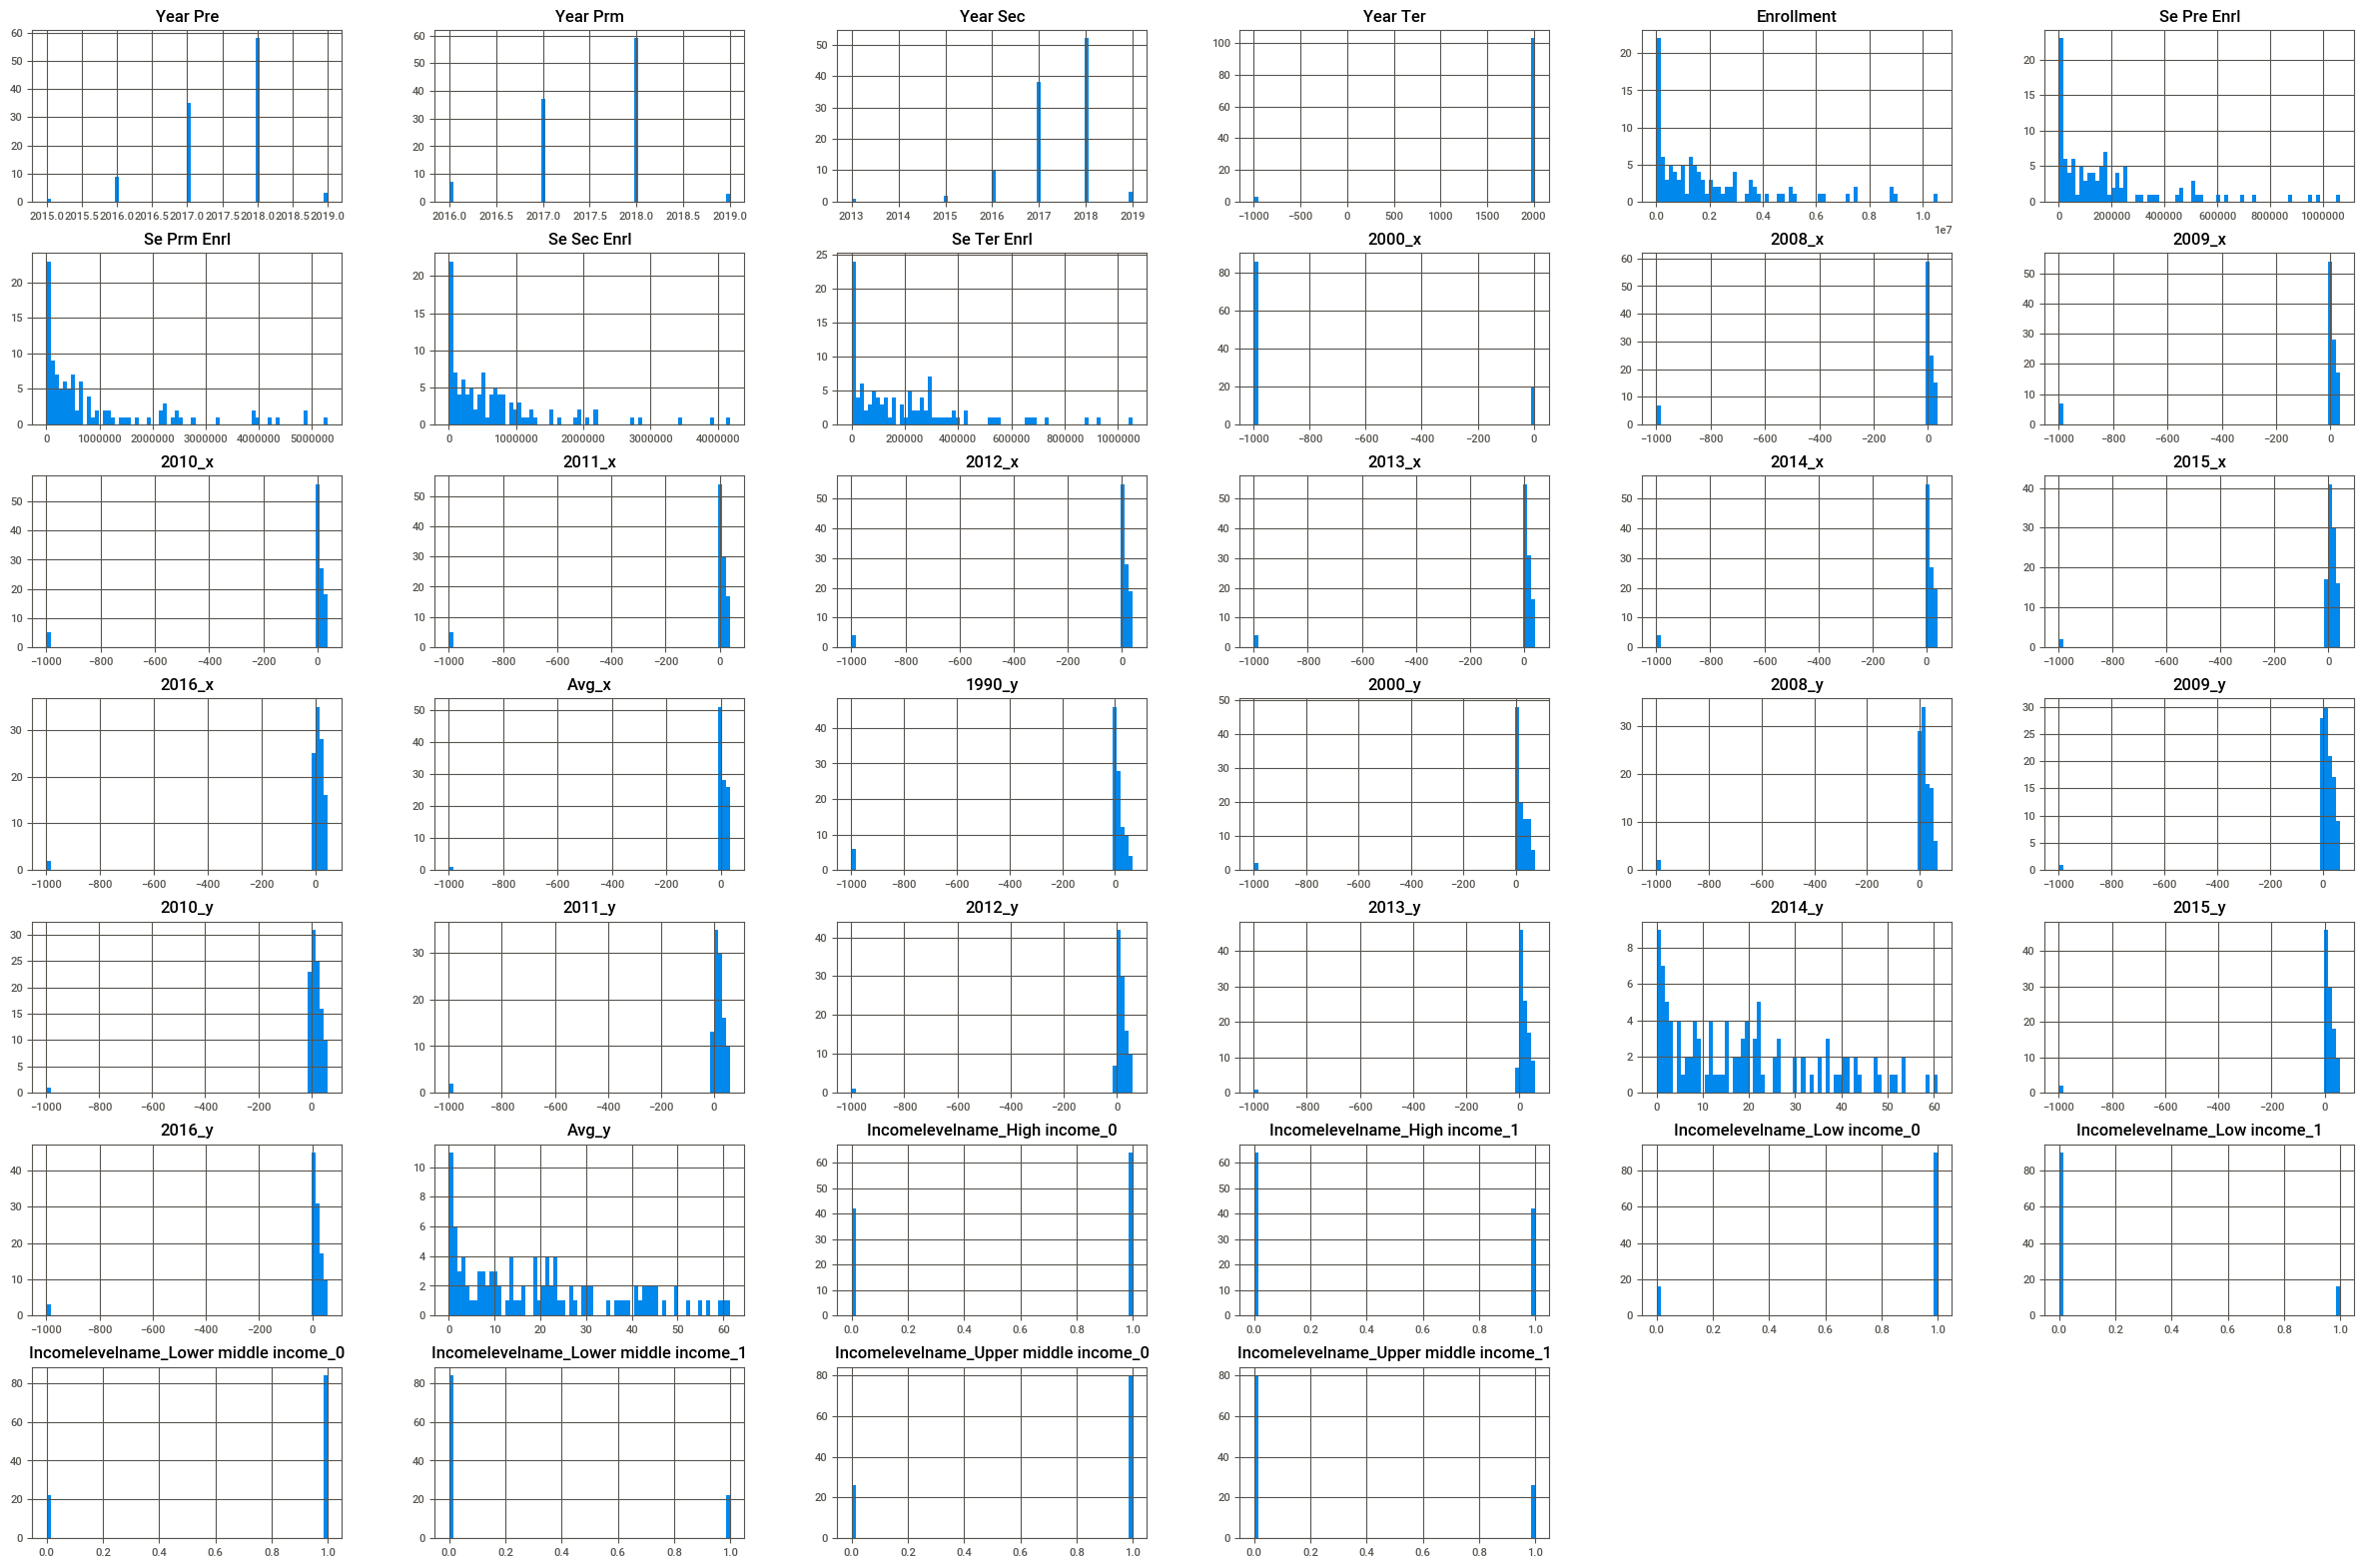

In [631]:
final_data_encoded1.hist(bins=70, figsize=(30,20))

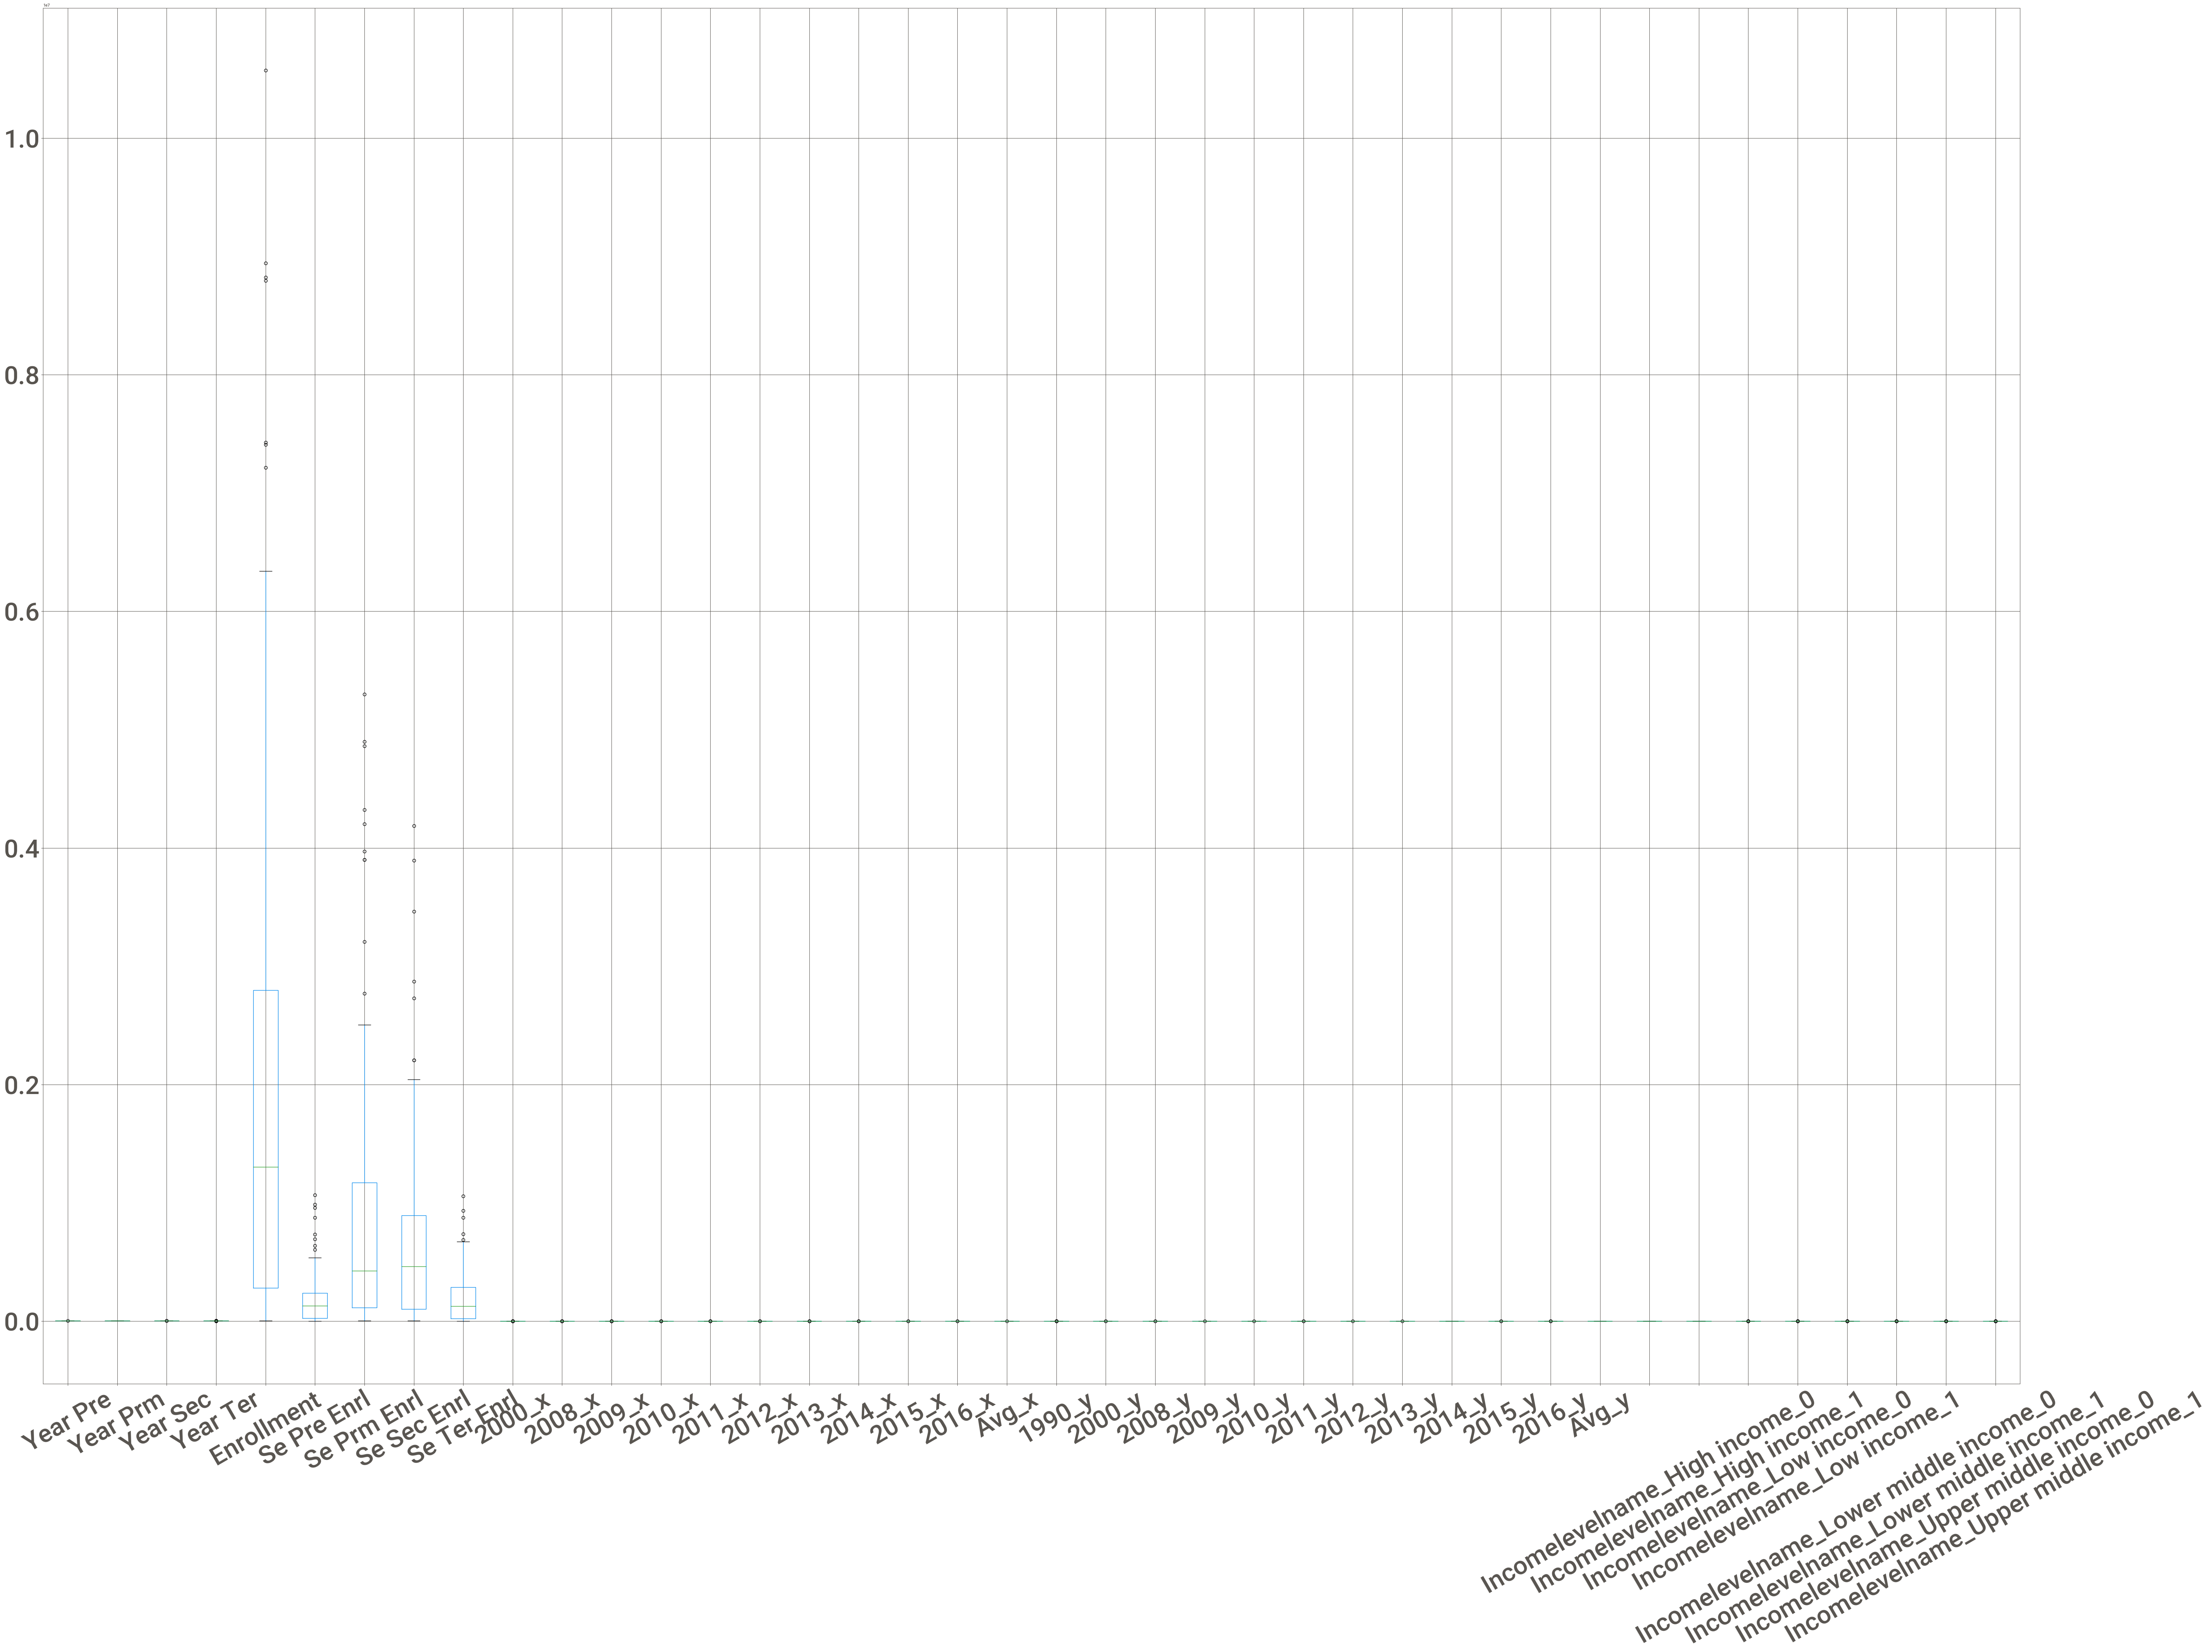

In [632]:
final_data_encoded1.boxplot(figsize=(70,50), fontsize=50, rot=30)
plt.show()

In [536]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [547]:
final_data_encoded1 = final_data_encoded1.fillna(-999)
final_data_encoded1

Year Pre  Year Prm  Year Sec  Year Ter  Enrollment  Se Pre Enrl  \
0      2018.0    2018.0    2018.0    2016.0      667452        47047   
1      2017.0    2017.0    2017.0    2017.0     1224406       224380   
2      2018.0    2018.0    2018.0    2018.0     1626357       150851   
3      2018.0    2018.0    2018.0    2018.0      188432         8499   
4      2017.0    2017.0    2017.0    2016.0      998348        95481   
5      2018.0    2018.0    2018.0    2018.0     1317482       140344   
6      2018.0    2018.0    2018.0    2018.0     1604845       230010   
7      2018.0    2018.0    2018.0    -999.0     2966735       353898   
8      2018.0    2018.0    2018.0    2015.0     5131897       638551   
9      2017.0    2017.0    2017.0    2018.0     2290953       245010   
10     2017.0    2017.0    2017.0    2017.0     2648636       534846   
11     2018.0    2018.0    2018.0    2018.0     5218372       464189   
12     2017.0    2017.0    2017.0    2017.0     2204532       152462   
13     2015.0    2018.0    2018.0    2017.0      947589        36182   
14     2017.0    2017.0    2017.0    2015.0     8824167      1066381   
15     2018.0    2018.0    2018.0    2018.0     3660526       246677   
16     2017.0    2017.0    2017.0    2017.0     1708540       255875   
17     2018.0    2018.0    2018.0    2018.0     2372736       128036   
18     2018.0    2018.0    2018.0    2018.0     3464409       226706   
19     2018.0    2018.0    2018.0    2017.0     3006800       299149   
20     2018.0    2018.0    2018.0    2015.0     4559618       603637   
21     2016.0    2016.0    2016.0    2016.0      731094        34475   
22     2018.0    2018.0    2018.0    2017.0     3727291       131114   
23     2018.0    2018.0    2018.0    2017.0      277099        26183   
24     2016.0    2017.0    2017.0    2015.0       74610         9227   
25     2019.0    2019.0    2019.0    2018.0     8796624       958127   
26     2018.0    2018.0    2018.0    2018.0       20905         3065   
27     2016.0    2017.0    2017.0    2018.0      579807        53793   
28     2018.0    2018.0    2018.0    2018.0     7427233       874378   
29     2017.0    2016.0    2017.0    2012.0      976622        12489   
30     2018.0    2018.0    2018.0    2018.0    10572809       154103   
31     2018.0    2018.0    2018.0    2018.0     8943156       693233   
32     2018.0    2018.0    2018.0    2018.0      523241        21005   
33     2018.0    2018.0    2018.0    2018.0     1815809       349373   
34     2018.0    2018.0    2018.0    2018.0      108360        13869   
35     2017.0    2017.0    2015.0    2012.0     1415811       509618   
36     2018.0    2018.0    2018.0    2018.0      586158       132459   
37     2017.0    2017.0    2017.0    2017.0     2665410       461746   
38     2018.0    2018.0    2018.0    2018.0        4999          909   
39     2018.0    2018.0    2018.0    2018.0     1196010       182995   
40     2018.0    2018.0    2018.0    2018.0     1787732       217918   
41     2017.0    2017.0    2017.0    2017.0     1256983       117753   
42     2017.0    2017.0    2017.0    2017.0     2000703       253959   
43     2018.0    2018.0    2018.0    2018.0      652592        81026   
44     2017.0    2017.0    2017.0    2017.0       98224        13115   
45     2018.0    2018.0    2015.0    2018.0      777169        78830   
46     2016.0    2016.0    2016.0    2011.0     6119823        36320   
47     2017.0    2017.0    2017.0    2017.0     1791758       306065   
48     2018.0    2018.0    2018.0    2018.0     1983999       203011   
49     2017.0    2017.0    2017.0    2017.0      180617        24280   
50     2017.0    2017.0    2017.0    2017.0     2068763       367453   
51     2017.0    2017.0    2017.0    2017.0     3483465       521196   
52     2017.0    2017.0    2017.0    2017.0     2984498       455934   
53     2017.0    2017.0    2017.0    2017.0     1497943       178961   
54     2017.0    2017.0    2017.0    2017.0  

# Feature Extraction for lower middle income type

In [603]:
y = final_data_encoded1["Incomelevelname_Lower middle income_1"]
X = final_data_encoded1.drop(['Incomelevelname_Lower middle income_1'], axis = 1)

cols = X.columns
index = X.index

In [604]:
X.head()

Year Pre  Year Prm  Year Sec  Year Ter  Enrollment  Se Pre Enrl  \
0    2018.0    2018.0    2018.0    2016.0      667452        47047   
1    2017.0    2017.0    2017.0    2017.0     1224406       224380   
2    2018.0    2018.0    2018.0    2018.0     1626357       150851   
3    2018.0    2018.0    2018.0    2018.0      188432         8499   
4    2017.0    2017.0    2017.0    2016.0      998348        95481   

   Se Prm Enrl  Se Sec Enrl  Se Ter Enrl  2000_x      2008_x      2009_x  \
0       349753       260421        10231  -999.0    0.000818    0.001259   
1       264503       485586       249937  -999.0   11.241056   13.403285   
2       488184       764986       222336  -999.0 -999.000000 -999.000000   
3        91768        76221        11944  -999.0    0.297619    0.479460   
4       418852       322913       161102  -999.0    5.521067    6.482052   

       2010_x     2011_x     2012_x     2013_x     2014_x     2015_x  \
0    0.002055   0.002377   0.003017   0.002305   0.003060   0.007421   
1   15.221226  17.138621  18.298666  19.681064  20.659730  22.699599   
2 -999.000000   3.790872   4.417874   4.924884   5.300275   6.034539   
3    1.210005   1.814159   2.260111   2.716504   3.262874   3.589878   
4    7.022377   7.562077   7.751636   7.951669   7.897699   7.928250   

      2016_x      Avg_x      1990_y     2000_y     2008_y     2009_y  \
0   0.008649   0.003440 -999.000000   0.775611   0.750906   0.872148   
1  23.253333  17.955176   24.661553  36.020029  29.180609  29.617723   
2   6.872839   5.223547 -999.000000   8.494457   9.294021   9.407581   
3   3.940887   2.174611    0.349238   2.506423   3.969464   3.739734   
4   9.548676   7.518389    8.686991  14.047837  14.746080  14.833486   

      2010_y     2011_y     2012_y     2013_y     2014_y     2015_y  \
0   0.944618   0.985580   0.980114   0.977952   0.979166   0.979572   
1  29.289576  30.994084  29.306877  26.892418  25.348417  23.266730   
2   8.981131   9.301932   9.336368   9.315708   9.086579   8.936393   
3   3.667258   3.768701   3.640361   3.512846   3.111872   2.809027   
4  14.662812  14.977053  14.987845  14.932780  14.987123  15.558095   

      2016_y      Avg_y  Incomelevelname_High income_0  \
0   0.952679   0.919834                              1   
1  20.958412  28.087487                              1   
2   9.263858   9.141803                              1   
3   2.679930   3.340562                              1   
4  15.845310  14.957842                              0   

   Incomelevelname_High income_1  Incomelevelname_Low income_0  \
0                              0                             0   
1                              0                             1   
2                              0                             1   
3                              0                             1   
4                              1                             1   

   Incomelevelname_Low income_1  Incomelevelname_Lower middle income_0  \
0                             1                                      1   
1                             0                                      1   
2                             0                                      0   
3                             0                                      0   
4                             0                                      1   

   Incomelevelname_Upper middle income_0  \
0                                      1   
1                                      0   
2                                      1   
3                                      1   
4                                      1   

   Incomelevelname_Upper middle income_1  
0                                      0  
1                                      1  
2                                      0  
3                                      0  
4                                      0

## Feature Standardisation

In [605]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

### Splitting data into training and testing sets 

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test

## Random Forest Classifier

In [607]:
model = RandomForestClassifier()

In [608]:
model.fit(X_train,y_train)

/Users/purnima/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [609]:
model.score(X_test,y_test)

0.9545454545454546

In [610]:
y_pred = model.predict(X_test)

In [611]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix for Random Forest Classifier:\n')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix for Random Forest Classifier:

[[18  0]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.75      0.86         4

    accuracy                           0.95        22
   macro avg       0.97      0.88      0.92        22
weighted avg       0.96      0.95      0.95        22



## Logistic Regression

In [612]:
from sklearn.linear_model import LogisticRegression

In [613]:
logReg = LogisticRegression()

In [614]:
logReg.fit(X_train, y_train)

/Users/purnima/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [615]:
logReg.score(X_test,y_test)

0.9090909090909091

In [616]:
y_pred_logReg = logReg.predict(X_test)

In [617]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix for Logistic Regression Classifier:\n')
print(confusion_matrix(y_test, y_pred_logReg))
print(classification_report(y_test, y_pred_logReg))

Confusion Matrix for Logistic Regression Classifier:

[[16  2]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.67      1.00      0.80         4

    accuracy                           0.91        22
   macro avg       0.83      0.94      0.87        22
weighted avg       0.94      0.91      0.92        22



## Decision Tree classifier

In [635]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [636]:
dt.score(X_test,y_test)

1.0

In [637]:
y_pred_dt = dt.predict(X_test)

In [638]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix for Decision Tree Classifier:\n')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Classifier:

[[18  0]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



## Conclusion

#### There are many algorithms to classify students based on their income level.

#### Firstly, I filled NaN values with (-999) so that all values remain in same float format. 

#### Then I first used Random Forest Classifier to train the training Dataset. It showed the accuracy of 95%.

#### After that I trained Logistic Regression Model which showed the accuracy of 90%.

#### Lastly, I trained Decision Tree Classifier which was able to predict target variable successfully with a accuracy of 100%, therfore it was overfitting. I tried changing the depth to 6,10 etc, but it couldnt improve the the overfitting. 

# Prediction

### The model that produced the best result was Random Forest with the highest accuracy. Logistic Regression was a good model with moderate accuracy, and Decision Tree couldn’t improve its overfitting model.